<div style="background-color: #eee3d3">
<h1> 3-transformation_scaling_normalisation.ipynb </h1>
</div>

# Transformation, scaling and normalization

---

### The purpose of this notebook is to use different methods to transform/scale/normalise the data in our peak table :

- Transformation methods : apply the same mathematical transformation to all values in the peak table

- Metabolite-based Scaling Methods : scale the features to make them fit a normal distribution, which is often required for further downstream analysis : statistical tests, machine learning algorithms ...

- Sample-based Normalisation Methods : normalise the samples so they can be comparable, e.g. normalise them to have a unit form, which is required for some machine learning algorithm based on distance assumption (SVD, KNN, ...)

---

The notebook has been initially run with the peak table imputed with the KNN imputation method but not sure this is the best method ! Who knows ? :)

You can test this notebook with peak tables imputed with different methods to compare the results.

_Idea (__bonus__) : create a notebook which, on a given peak table, automatically applies all the possible combinaisons of missing value imputation + transformation (or not) + scaling (or not) + normalisation (or not), and then assess automatically assess which combinaison(s) is(are) the best. (This will create many peak tables and could be computationally heavy)_

---

## Import modules

In [29]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import seaborn as sns
import math
import numpy as np
import os
import sys

sys.path.append('/'.join(os.getcwd().split('/')[:-1]) + '/bin/')


In [30]:
import normalisation_scaling_functions as nsf

## Import data

We import the peak table we inputed with the KNN method in the previous notebook

In [31]:
path_X_imputed = '/'.join(os.getcwd().split('/')[:-1]) + '/data/peakTable/imputed_peak_tables/'

In [32]:
# Complete the following path with the chosen imputed peak table
X_imp = pd.read_csv(path_X_imputed+"X_KNN_samples.csv", sep=',', decimal='.', na_values='NA')
X_imp

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,19.761786,14.635833,22.185582,16.414744,12.615143,15.580604,15.881437,17.500899,12.792893,16.805604,...,12.052252,12.568647,13.192848,13.230752,12.248590,12.114328,14.269258,12.355017,13.114289,13.882526
1,19.735279,15.193396,20.831414,15.052533,12.519222,15.145423,14.034654,17.953780,11.971249,15.907714,...,13.020365,12.928643,13.697314,12.927804,12.604052,12.102163,13.568853,12.208084,12.609957,13.452546
2,19.116076,15.446714,22.152604,16.410827,12.383736,14.628890,15.316772,17.404715,12.786407,15.947176,...,12.411317,12.379802,13.136575,13.330175,12.226220,11.877304,14.215988,12.185576,12.955618,13.778398
3,19.376875,15.460525,22.169389,16.403964,12.720767,15.937169,15.967749,15.836957,12.278686,16.371211,...,12.674914,12.621035,13.086805,13.304171,12.298832,11.605353,14.284148,12.319119,13.058285,13.812829
4,19.555938,14.515536,22.150249,16.372219,12.314019,14.950203,15.294906,16.610171,12.214057,16.171763,...,12.731422,12.521877,12.617334,13.306722,12.349830,11.926237,14.192775,12.356960,13.006556,13.841201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,19.664978,14.447858,20.808503,15.027154,12.648327,14.806952,14.244917,17.126579,12.080710,15.388376,...,12.349299,11.505004,13.189121,12.175600,12.198922,12.102162,12.363040,12.402860,12.032016,12.050912
182,19.301954,14.839941,21.085175,15.321075,12.510670,14.488147,15.163197,16.816591,12.452644,16.474456,...,12.909283,12.642143,12.742126,12.109005,12.708850,12.462751,12.175110,12.635066,12.001124,12.203054
183,19.170626,14.291711,21.381912,15.197205,12.499558,14.434959,14.520558,16.315887,12.808417,15.613263,...,12.846355,13.243400,13.031584,12.165298,12.199647,12.082515,12.251595,12.258149,12.029196,12.277214
184,18.869505,14.440576,20.961485,14.829978,12.312338,14.114074,13.776358,16.110117,12.667428,16.021372,...,12.477753,11.789382,13.237739,12.389888,11.628154,12.077076,12.450109,12.383578,12.102824,12.050912


In [33]:
nsf.print_stats(X_imp)

----------X.min().mean()----------
 13.319122228357132 

----------X.max().mean()----------
 16.652160409361407 

----------X.mean().mean()---------
 14.914078533165021 

----------X.std().mean()----------
 0.5933310233465334 



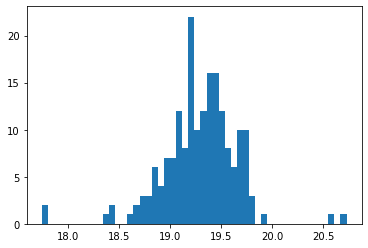

In [34]:
n, bins, patches=plt.hist(X_imp["variable_3"],bins=50)

In [35]:
X_imp.iloc[0,]

variable_3       19.761786
variable_5       14.635833
variable_6       22.185582
variable_7       16.414744
variable_8       12.615143
                   ...    
variable_2365    12.114328
variable_2368    14.269258
variable_2370    12.355017
variable_2375    13.114289
variable_2379    13.882526
Name: 0, Length: 557, dtype: float64

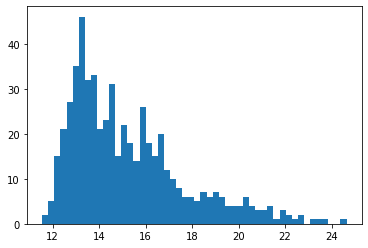

In [36]:
n, bins, patches=plt.hist(X_imp.iloc[0,],bins=50)

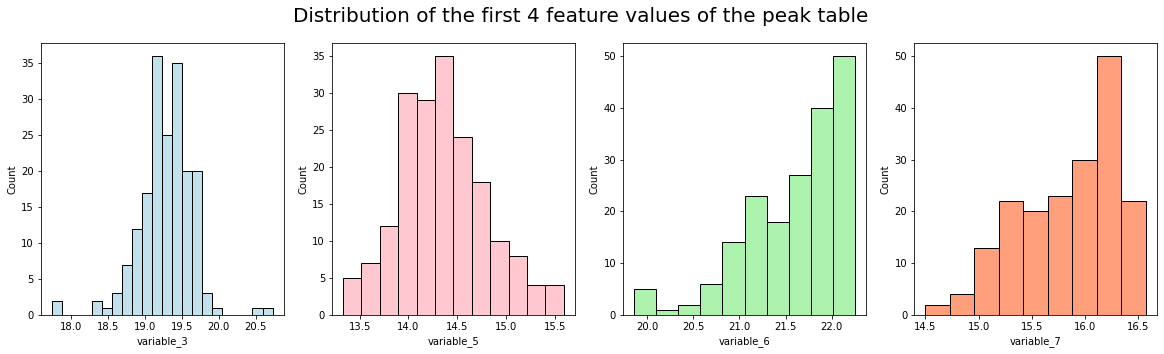

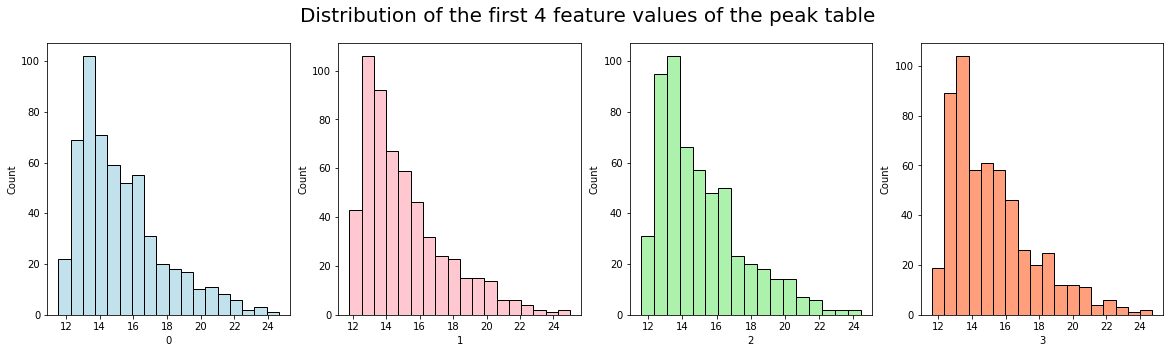

In [37]:
nsf.plot_first_distributions_metabolites(X_imp)
nsf.plot_first_distributions_samples(X_imp)

We can see that the values can be in a different range according to the feature. For further analysis, it would be better to apply a few transformation on our peak table :
- a normalisation (for example a StandardScaler) on each feature to have a mean value of 0 et a std of 1
- a scaling (for example with Normalizer) on each samples to have a vector norm equal to 1

This will allow to compare with an equal weight all to features and all the samples.

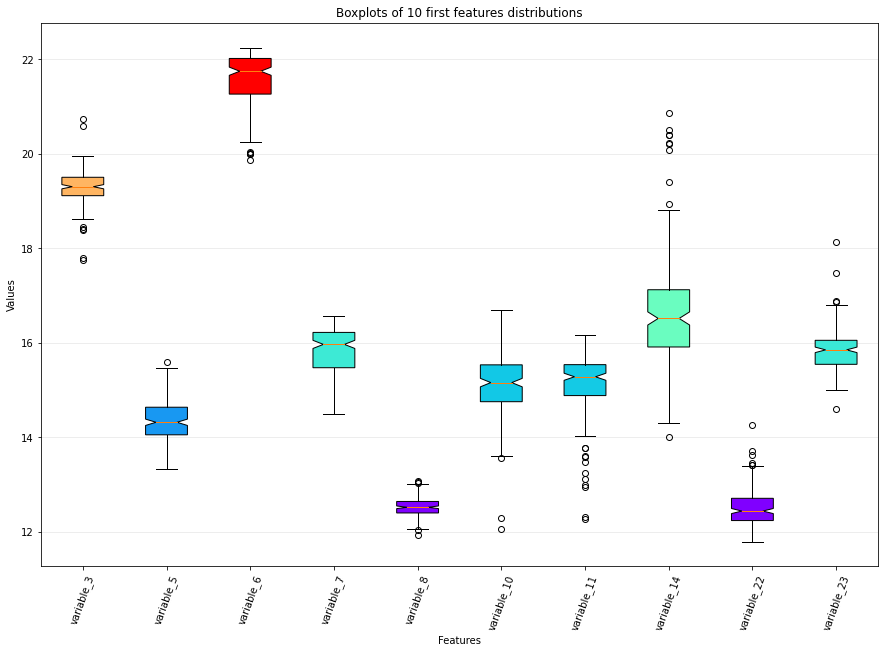

In [38]:
nsf.boxplot_first_distributions_metabolites(X_imp)

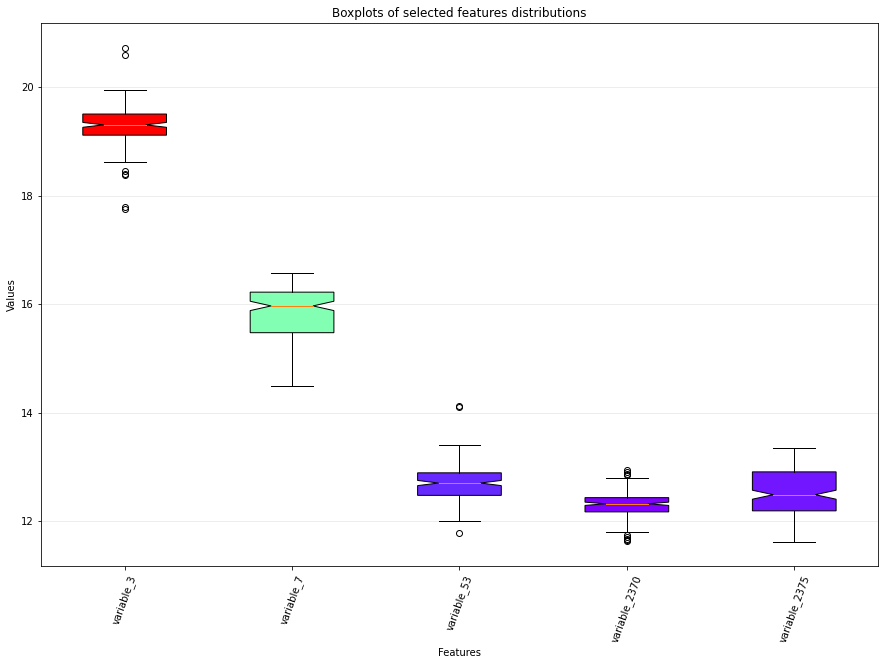

In [39]:
nsf.boxplot_first_distributions_metabolites(X_imp, list_features=['variable_3', 'variable_7', 'variable_53', 'variable_2370', 'variable_2375'])

# Transformation methods

Inspired by [this link](https://www.statology.org/transform-data-in-python/), we can transform our data to make it more normally distributed, with one of these three methods, for each column y :
- __loge__ : Log Transformation (base-e log i.e. natural log) : $log_e(y)$
- __log2__ : Log Transformation (base-2 log) : $log_{2}(y)$
- __log10__ : Log Transformation (base-10 log) : $log_{10}(y)$
- __sqrt__ : Square Root Transformation : $\sqrt y$
- __cbrt__ : Cube Root Transformation : $^3\sqrt y$


## Based-e log

In [40]:
nsf.normPeakTable(X_imp, 'loge', based='metabolite')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,2.983750,2.683473,3.099443,2.798180,2.534898,2.746027,2.765151,2.862252,2.548890,2.821712,...,2.489252,2.531205,2.579675,2.582544,2.505411,2.494389,2.658107,2.514062,2.573702,2.630631
1,2.982408,2.720861,3.036462,2.711546,2.527265,2.717698,2.641530,2.887801,2.482508,2.766804,...,2.566515,2.559445,2.617200,2.559380,2.534018,2.493384,2.607777,2.502098,2.534487,2.599168
2,2.950530,2.737396,3.097955,2.797941,2.516384,2.682998,2.728948,2.856741,2.548383,2.769282,...,2.518609,2.516066,2.575400,2.590030,2.503583,2.474629,2.654367,2.500253,2.561529,2.623102
3,2.964080,2.738290,3.098712,2.797523,2.543236,2.768654,2.770571,2.762346,2.507865,2.795524,...,2.539625,2.535365,2.571604,2.588078,2.509504,2.451466,2.659150,2.511152,2.569423,2.625598
4,2.973279,2.675220,3.097849,2.795586,2.510738,2.704725,2.727520,2.810015,2.502588,2.783267,...,2.544073,2.527477,2.535072,2.588269,2.513642,2.478741,2.652733,2.514219,2.565454,2.627650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2.978839,2.670546,3.035362,2.709859,2.537525,2.695097,2.656400,2.840632,2.491610,2.733612,...,2.513599,2.442782,2.579392,2.499434,2.501348,2.493384,2.514711,2.517927,2.487571,2.489140
182,2.960206,2.697322,3.048570,2.729229,2.526582,2.673331,2.718871,2.822366,2.521933,2.801811,...,2.557947,2.537036,2.544913,2.493949,2.542299,2.522744,2.499394,2.536476,2.485000,2.501686
183,2.953379,2.659680,3.062545,2.721112,2.525693,2.669653,2.675565,2.792139,2.550103,2.748121,...,2.553060,2.583499,2.567376,2.498587,2.501407,2.491759,2.505656,2.506191,2.487337,2.507745
184,2.937547,2.670042,3.042687,2.696651,2.510602,2.647172,2.622954,2.779447,2.539034,2.773924,...,2.523947,2.467199,2.583072,2.516881,2.453429,2.491309,2.521729,2.516371,2.493439,2.489140


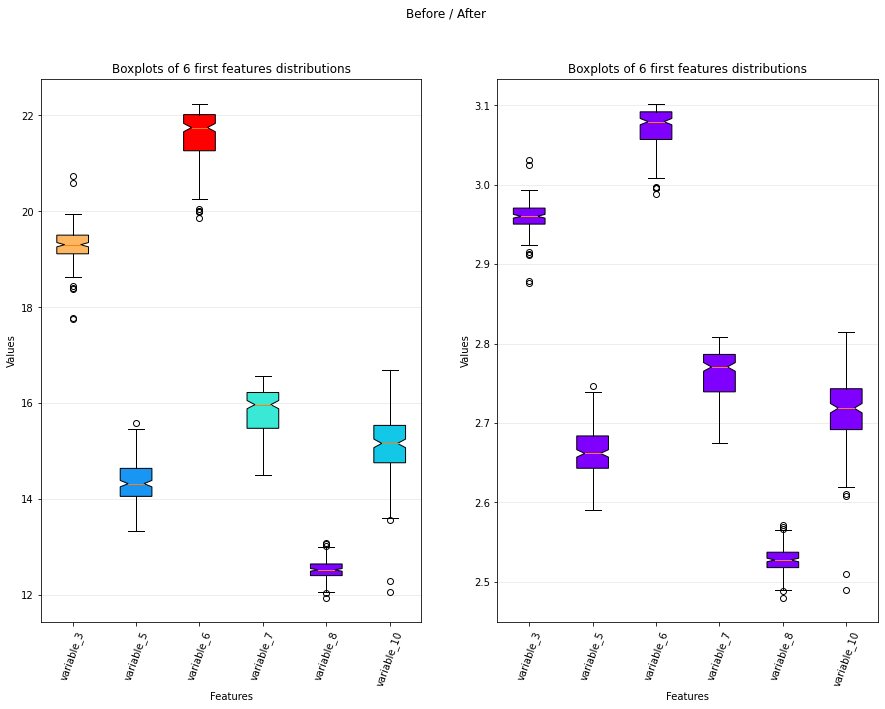

In [41]:
nsf.boxplot_first_distributions_metabolites_before_after(X_imp, nsf.normPeakTable(X_imp, 'loge', based='metabolite'), n=6)

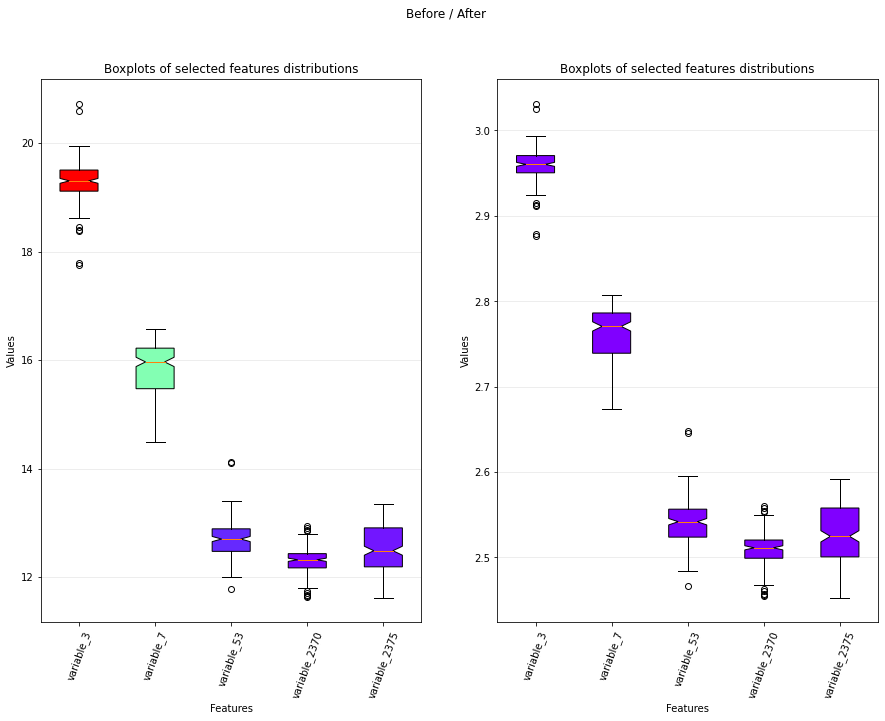

In [42]:
list_features = ['variable_3', 'variable_7', 'variable_53', 'variable_2370', 'variable_2375']
nsf.boxplot_first_distributions_metabolites_before_after(X_imp, nsf.normPeakTable(X_imp, 'loge', based=''), list_features=list_features)

## Based-2 log

In [43]:
nsf.normPeakTable(X_imp, 'log2', based='metabolite')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,4.304641,3.871433,4.471551,4.036920,3.657085,3.961679,3.989270,4.129357,3.677271,4.070870,...,3.591231,3.651757,3.721684,3.725823,3.614544,3.598643,3.834838,3.627025,3.713068,3.795198
1,4.302705,3.925373,4.380689,3.911934,3.646073,3.920810,3.810922,4.166216,3.581502,3.991655,...,3.702698,3.692499,3.775821,3.692405,3.655816,3.597193,3.762227,3.609765,3.656491,3.749807
2,4.256715,3.949228,4.469404,4.036576,3.630375,3.870748,3.937040,4.121406,3.676539,3.995229,...,3.633584,3.629916,3.715517,3.736624,3.611907,3.570135,3.829442,3.607103,3.695506,3.784336
3,4.276264,3.950517,4.470497,4.035973,3.669114,3.994323,3.997089,3.985223,3.618084,4.033089,...,3.663904,3.657758,3.710041,3.733807,3.620449,3.536719,3.836343,3.622827,3.706894,3.787937
4,4.289535,3.859526,4.469251,4.033178,3.622230,3.902093,3.934979,4.053995,3.610471,4.015405,...,3.670322,3.646379,3.657335,3.734083,3.626419,3.576067,3.827085,3.627252,3.701167,3.790897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,4.297557,3.852784,4.379101,3.909500,3.660875,3.888203,3.832375,4.098165,3.594633,3.943769,...,3.626357,3.524190,3.721277,3.605921,3.608682,3.597193,3.627962,3.632601,3.588807,3.591070
182,4.270675,3.891413,4.398157,3.937446,3.645087,3.856801,3.922502,4.071813,3.638380,4.042159,...,3.690337,3.660169,3.671534,3.598008,3.667762,3.639551,3.605863,3.659361,3.585098,3.609170
183,4.260826,3.837107,4.418319,3.925734,3.643805,3.851495,3.860025,4.028206,3.679020,3.964700,...,3.683287,3.727202,3.703941,3.604700,3.608767,3.594849,3.614898,3.615669,3.588468,3.617911
184,4.237985,3.852056,4.389669,3.890445,3.622033,3.819063,3.784123,4.009895,3.663052,4.001926,...,3.641286,3.559416,3.726585,3.631091,3.539550,3.594199,3.638087,3.630356,3.597272,3.591070


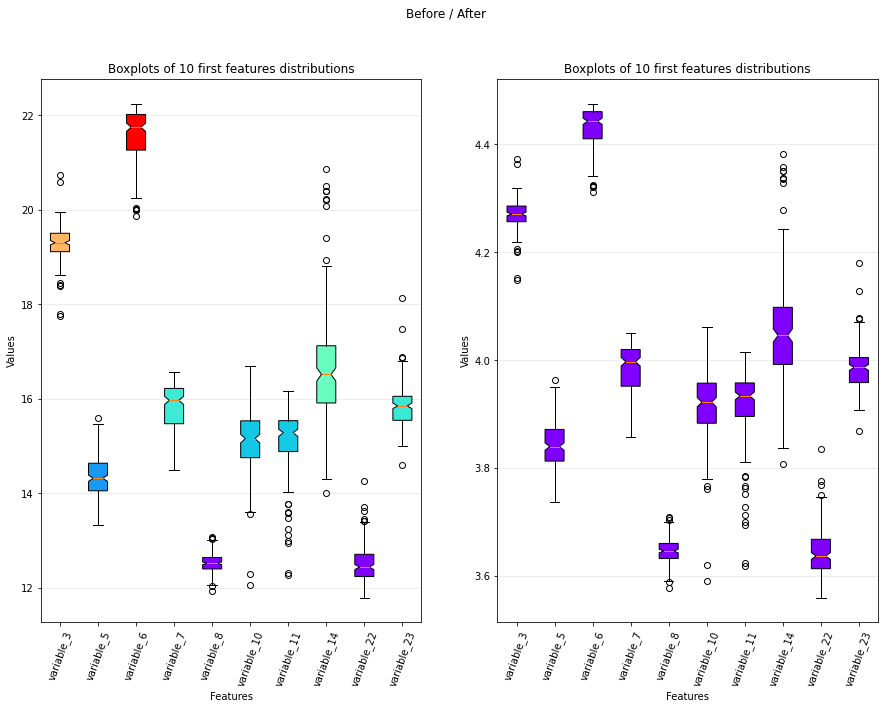

In [44]:
nsf.boxplot_first_distributions_metabolites_before_after(X_imp, nsf.normPeakTable(X_imp, 'log2', based='samples'))

## Based-10 log

In [45]:
nsf.normPeakTable(X_imp, 'log10', based='metabolite')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,1.295826,1.165417,1.346071,1.215234,1.100892,1.192584,1.200890,1.243060,1.106969,1.225454,...,1.081068,1.099289,1.120339,1.121585,1.088086,1.083299,1.154401,1.091843,1.117745,1.142469
1,1.295243,1.181655,1.318719,1.177610,1.097577,1.180281,1.147202,1.254156,1.078139,1.201608,...,1.114623,1.111553,1.136635,1.111525,1.100510,1.082863,1.132543,1.086648,1.100714,1.128804
2,1.281399,1.188836,1.345425,1.215130,1.092852,1.165211,1.185167,1.240667,1.106749,1.202684,...,1.093818,1.092714,1.118482,1.124836,1.087292,1.074718,1.152777,1.085846,1.112458,1.139199
3,1.287284,1.189224,1.345754,1.214949,1.104513,1.202411,1.203244,1.199672,1.089152,1.214081,...,1.102945,1.101095,1.116834,1.123988,1.089864,1.064658,1.154854,1.090580,1.115886,1.140283
4,1.291279,1.161833,1.345379,1.214108,1.090400,1.174647,1.184547,1.220374,1.086860,1.208757,...,1.104877,1.097669,1.100968,1.124071,1.091661,1.076503,1.152067,1.091912,1.114162,1.141174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1.293693,1.159803,1.318241,1.176877,1.102033,1.170466,1.153660,1.233671,1.082092,1.187193,...,1.091642,1.060887,1.120216,1.085490,1.086321,1.082863,1.092125,1.093522,1.080338,1.081020
182,1.285601,1.171432,1.323977,1.185289,1.097281,1.161013,1.180791,1.225738,1.095262,1.216811,...,1.110902,1.101821,1.105242,1.083108,1.104106,1.095614,1.085473,1.101578,1.079222,1.086469
183,1.282636,1.155084,1.330047,1.181764,1.096895,1.159416,1.161983,1.212611,1.107495,1.193494,...,1.108780,1.121999,1.114997,1.085123,1.086347,1.082157,1.088193,1.088425,1.080237,1.089100
184,1.275761,1.159585,1.321422,1.171141,1.090341,1.149652,1.139134,1.207099,1.102688,1.204700,...,1.096136,1.071491,1.121814,1.093067,1.065511,1.081962,1.095173,1.092846,1.082887,1.081020


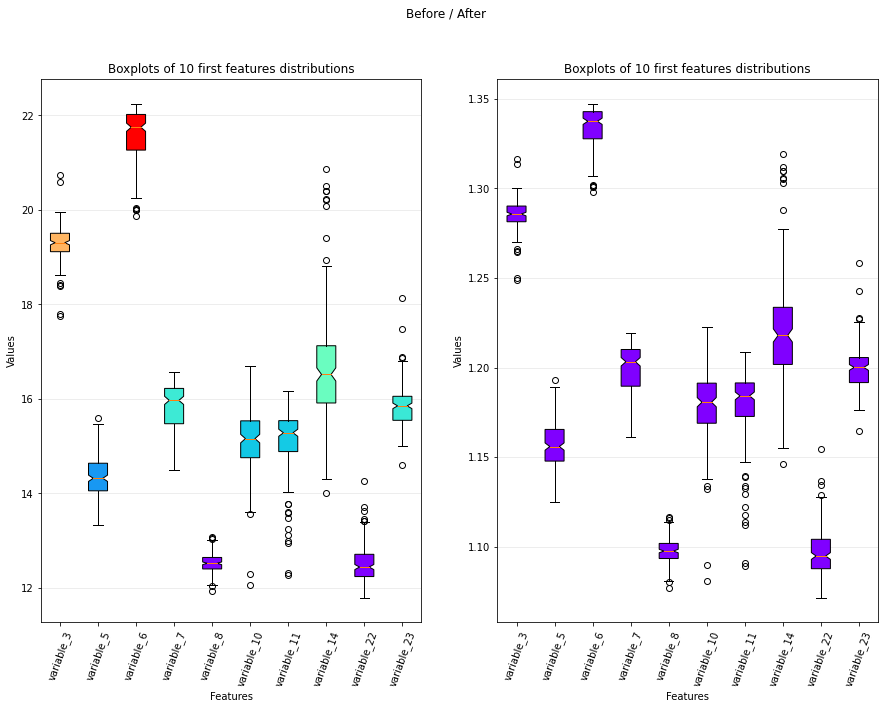

In [46]:
nsf.boxplot_first_distributions_metabolites_before_after(X_imp, nsf.normPeakTable(X_imp, 'log10', based='metabolite'))

## Square root

In [47]:
X_KNN=X_imp

In [48]:
nsf.normPeakTable(X_KNN, 'sqrt', based='metabolite')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,4.445423,3.825681,4.710157,4.051511,3.551780,3.947227,3.985152,4.183408,3.576715,4.099464,...,3.471635,3.545229,3.632196,3.637410,3.499799,3.480564,3.777467,3.514970,3.621366,3.725926
1,4.442441,3.897871,4.564144,3.879759,3.538251,3.891712,3.746285,4.237190,3.459949,3.988448,...,3.608374,3.595642,3.700988,3.595526,3.550219,3.478816,3.683592,3.494007,3.551050,3.667771
2,4.372194,3.930231,4.706655,4.051028,3.519053,3.824773,3.913665,4.171896,3.575809,3.993392,...,3.522970,3.518494,3.624441,3.651051,3.496601,3.446346,3.770410,3.490784,3.599391,3.711926
3,4.401917,3.931987,4.708438,4.050181,3.566618,3.992138,3.995967,3.979567,3.504096,4.046135,...,3.560185,3.552610,3.617569,3.647488,3.506969,3.406663,3.779438,3.509860,3.613625,3.716561
4,4.422210,3.809926,4.706405,4.046260,3.509134,3.866549,3.910870,4.075558,3.494862,4.021413,...,3.568112,3.538626,3.552089,3.647838,3.514233,3.453438,3.767330,3.515247,3.606460,3.720376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,4.434521,3.801034,4.561634,3.876487,3.556449,3.847980,3.774244,4.138427,3.475732,3.922802,...,3.514157,3.391903,3.631683,3.489355,3.492696,3.478816,3.516111,3.521769,3.468720,3.471442
182,4.393399,3.852264,4.591860,3.914214,3.537042,3.806330,3.893995,4.100804,3.528830,4.058874,...,3.592949,3.555579,3.569611,3.479800,3.564947,3.530262,3.489285,3.554584,3.464264,3.493287
183,4.378427,3.780438,4.624058,3.898359,3.535471,3.799337,3.810585,4.039293,3.578885,3.951362,...,3.584181,3.639148,3.609929,3.487879,3.492799,3.475991,3.500228,3.501164,3.468313,3.503886
184,4.343904,3.800076,4.578371,3.850971,3.508894,3.756870,3.711652,4.013741,3.559133,4.002671,...,3.532386,3.433567,3.638370,3.519927,3.410008,3.475209,3.528471,3.519031,3.478911,3.471442


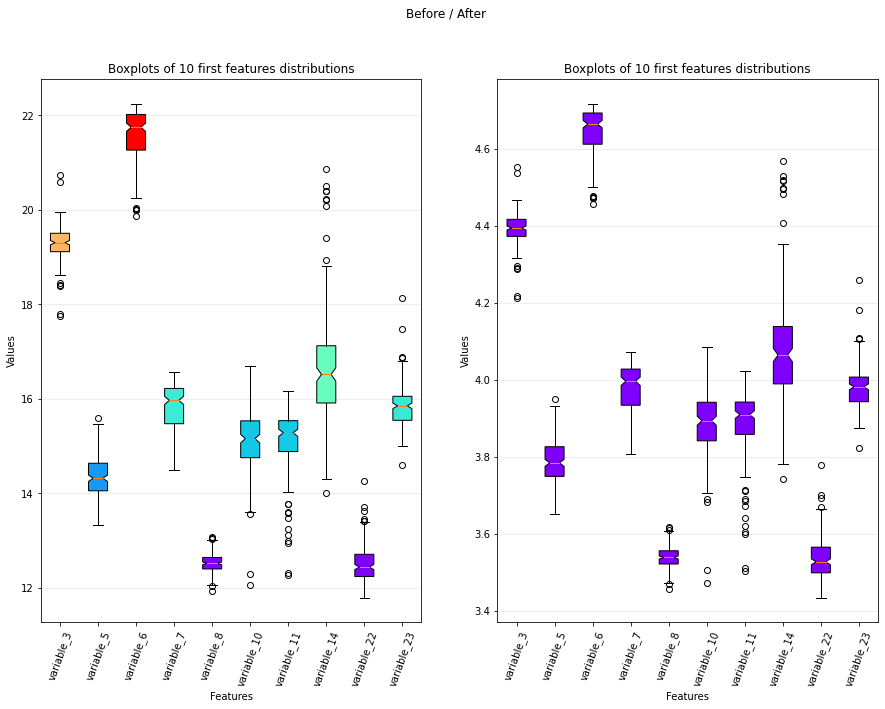

In [49]:
nsf.boxplot_first_distributions_metabolites_before_after(X_KNN, nsf.normPeakTable(X_KNN, 'sqrt', based='metabolite'))

## Cubic root

In [50]:
nsf.normPeakTable(X_KNN, 'cbrt', based='metabolite')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,2.703598,2.446090,2.809896,2.541429,2.327899,2.497630,2.513603,2.596291,2.338781,2.561443,...,2.292747,2.325035,2.362905,2.365165,2.305130,2.296676,2.425495,2.311787,2.358205,2.403382
1,2.702388,2.476766,2.751522,2.469088,2.321983,2.474156,2.412129,2.618496,2.287599,2.514988,...,2.352562,2.347025,2.392646,2.346974,2.327216,2.295907,2.385143,2.302586,2.327580,2.378308
2,2.673825,2.490455,2.808503,2.541227,2.313577,2.445703,2.483452,2.591526,2.338386,2.517066,...,2.315293,2.313332,2.359540,2.371075,2.303726,2.281599,2.422473,2.301170,2.348656,2.397358
3,2.685929,2.491197,2.809212,2.540873,2.334378,2.516539,2.518148,2.511254,2.307016,2.539181,...,2.331569,2.328261,2.356557,2.369532,2.308277,2.264051,2.426339,2.309546,2.354843,2.399353
4,2.694178,2.439370,2.808404,2.539233,2.309227,2.463480,2.482270,2.551475,2.302961,2.528827,...,2.335029,2.322148,2.328033,2.369684,2.311463,2.284728,2.421154,2.311908,2.351730,2.400995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2.699176,2.435573,2.750512,2.467699,2.329938,2.455586,2.424115,2.577648,2.294550,2.487316,...,2.311430,2.257506,2.362682,2.300542,2.302010,2.295907,2.312287,2.314767,2.291463,2.292662
182,2.682463,2.457409,2.762649,2.483684,2.321455,2.437835,2.475124,2.562001,2.317860,2.544507,...,2.345853,2.329558,2.335683,2.296340,2.333648,2.318487,2.300511,2.329123,2.289500,2.302270
183,2.676366,2.426767,2.775549,2.476973,2.320767,2.434848,2.439651,2.536317,2.339727,2.499374,...,2.342035,2.365919,2.353237,2.299893,2.302055,2.294664,2.305318,2.305729,2.291284,2.306924
184,2.662279,2.435164,2.757236,2.456859,2.309122,2.416671,2.397240,2.525610,2.331110,2.520964,...,2.319417,2.275955,2.365582,2.313960,2.265532,2.294320,2.317703,2.313567,2.295949,2.292662


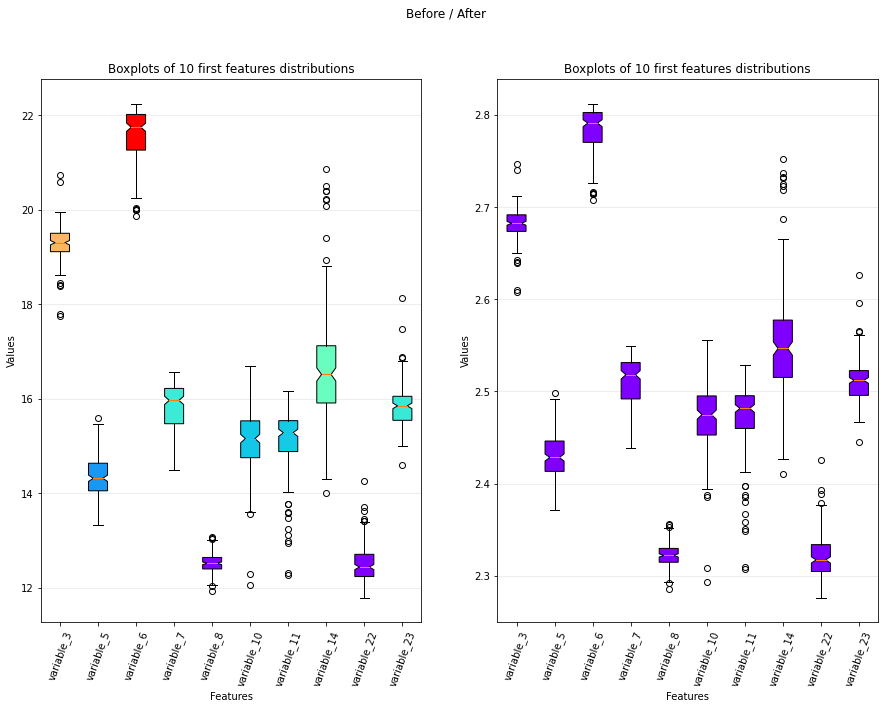

In [51]:
nsf.boxplot_first_distributions_metabolites_before_after(X_KNN, nsf.normPeakTable(X_KNN, 'cbrt', based='metabolite'))

# Metabolite-based Scaling Methods

At this point, we want to normalise our peak table based on metabolite values

*Reminder : peak table of dimension $(n,p)$, rows = samples with iterator $i$, columns = features (metabolites) with iterator $j$*

Inspired by [this course](https://www.uab.edu/proteomics/metabolomics/workshop/2014/statistical%20analysis.pdf) and [this paper (NOREVA)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5570188/), here are all the Metabolite-based Normalization Methods available in this notebook :

<table>
  <tr>
    <th>Method</th>
    <th>Formula</th>
  </tr>
  <tr>
    <td>Range scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{x_{j_{max}} - x_{j_{min}}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Min-max scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - x_{j_{min}}}{x_{j_{max}} - x_{j_{min}}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Maximum absolute scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij}}{x_{j_{max}}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Level scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\bar{x}_j}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Robust scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - Q_2(x_j)}{Q_3(x_j) - Q_1(x_j)}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Autoscaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Pareto scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\sqrt{s_j}}
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Vast scaling</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j} \cdot \frac{\bar{x}_j}{s_j}
        \end{eqnarray}
    </td>
  </tr>
</table>

## Range scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{x_{j_{max}} - x_{j_{min}}}
\end{eqnarray}

In [52]:
nsf.normPeakTable(X_KNN, 'range_scaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,0.675871,0.577259,0.973476,0.924485,0.592800,0.760018,0.924653,0.510354,0.404393,0.624237,...,0.177592,0.594254,0.474021,0.817463,0.535128,0.475982,0.959044,0.550078,0.865513,0.930305
1,0.666985,0.823965,0.406441,0.267175,0.508772,0.666295,0.451298,0.576482,0.072821,0.368954,...,0.689789,0.795382,0.623853,0.656213,0.801534,0.465016,0.670182,0.437001,0.573372,0.743419
2,0.459405,0.936051,0.959667,0.922595,0.390084,0.555052,0.779922,0.496310,0.401776,0.380174,...,0.367562,0.488746,0.457307,0.870383,0.518363,0.262336,0.937075,0.419679,0.773600,0.885047
3,0.546835,0.942163,0.966695,0.919283,0.685329,0.836809,0.946776,0.267393,0.196887,0.500733,...,0.507022,0.623523,0.442525,0.856542,0.572783,0.017208,0.965185,0.522451,0.833072,0.900012
4,0.606863,0.524031,0.958681,0.903965,0.329011,0.624252,0.774317,0.380294,0.170806,0.444027,...,0.536919,0.568123,0.303087,0.857900,0.611004,0.306443,0.927501,0.551573,0.803107,0.912343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.643418,0.494085,0.396848,0.254929,0.621869,0.593400,0.505192,0.455698,0.116994,0.221298,...,0.334750,0.000000,0.472914,0.255836,0.497905,0.465016,0.172879,0.586897,0.238592,0.134214
182,0.521718,0.667571,0.512699,0.396755,0.501280,0.524741,0.740559,0.410435,0.267087,0.530087,...,0.631019,0.635316,0.340151,0.220390,0.880076,0.790039,0.095373,0.765597,0.220697,0.200341
183,0.477692,0.424994,0.636953,0.336984,0.491546,0.513286,0.575842,0.337325,0.410658,0.285237,...,0.597726,0.971236,0.426124,0.250353,0.498448,0.447307,0.126917,0.475530,0.236958,0.232574
184,0.376745,0.490863,0.460906,0.159786,0.327538,0.444179,0.385094,0.307279,0.353763,0.401269,...,0.402711,0.158881,0.487354,0.369895,0.070135,0.442404,0.208788,0.572058,0.279608,0.134214


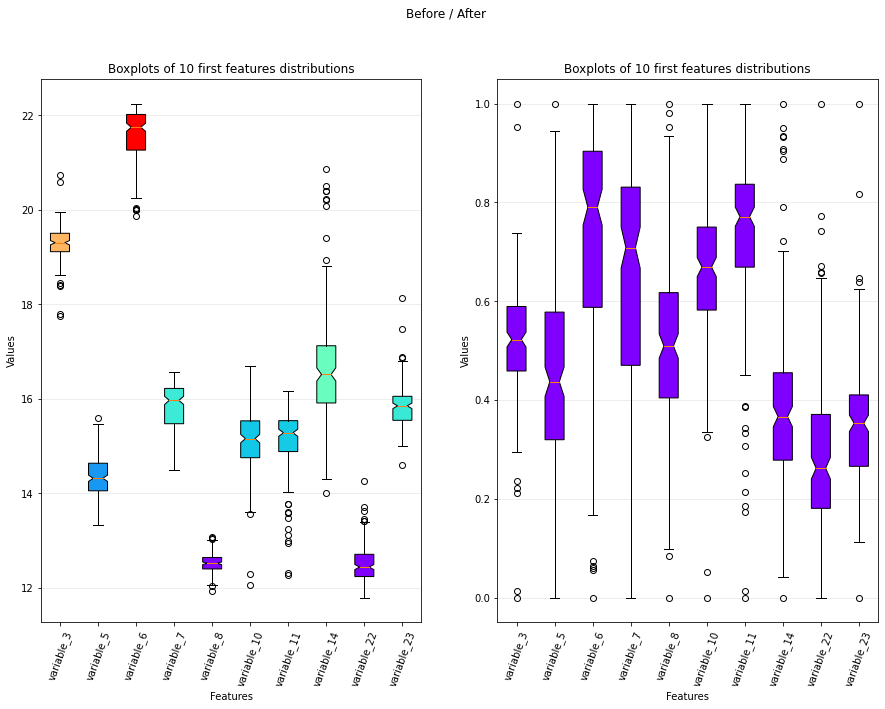

In [53]:
nsf.boxplot_first_distributions_metabolites_before_after(X_KNN, nsf.normPeakTable(X_KNN, 'range_scaling', based='metabolite'))

## Mini-max scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - x_{j_{min}}}{x_{j_{max}} - x_{j_{min}}}
\end{eqnarray}

_Use <code>MinMaxScaler()</code> function from <code>scikitlearn</code> package_

In [54]:
nsf.normPeakTable(X_KNN, 'minmax_scaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,0.675871,0.577259,0.973476,0.924485,0.592800,0.760018,0.924653,0.510354,0.404393,0.624237,...,0.177592,0.594254,0.474021,0.817463,0.535128,0.475982,0.959044,0.550078,0.865513,0.930305
1,0.666985,0.823965,0.406441,0.267175,0.508772,0.666295,0.451298,0.576482,0.072821,0.368954,...,0.689789,0.795382,0.623853,0.656213,0.801534,0.465016,0.670182,0.437001,0.573372,0.743419
2,0.459405,0.936051,0.959667,0.922595,0.390084,0.555052,0.779922,0.496310,0.401776,0.380174,...,0.367562,0.488746,0.457307,0.870383,0.518363,0.262336,0.937075,0.419679,0.773600,0.885047
3,0.546835,0.942163,0.966695,0.919283,0.685329,0.836809,0.946776,0.267393,0.196887,0.500733,...,0.507022,0.623523,0.442525,0.856542,0.572783,0.017208,0.965185,0.522451,0.833072,0.900012
4,0.606863,0.524031,0.958681,0.903965,0.329011,0.624252,0.774317,0.380294,0.170806,0.444027,...,0.536919,0.568123,0.303087,0.857900,0.611004,0.306443,0.927501,0.551573,0.803107,0.912343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.643418,0.494085,0.396848,0.254929,0.621869,0.593400,0.505192,0.455698,0.116994,0.221298,...,0.334750,0.000000,0.472914,0.255836,0.497905,0.465016,0.172879,0.586897,0.238592,0.134214
182,0.521718,0.667571,0.512699,0.396755,0.501280,0.524741,0.740559,0.410435,0.267087,0.530087,...,0.631019,0.635316,0.340151,0.220390,0.880076,0.790039,0.095373,0.765597,0.220697,0.200341
183,0.477692,0.424994,0.636953,0.336984,0.491546,0.513286,0.575842,0.337325,0.410658,0.285237,...,0.597726,0.971236,0.426124,0.250353,0.498448,0.447307,0.126917,0.475530,0.236958,0.232574
184,0.376745,0.490863,0.460906,0.159786,0.327538,0.444179,0.385094,0.307279,0.353763,0.401269,...,0.402711,0.158881,0.487354,0.369895,0.070135,0.442404,0.208788,0.572058,0.279608,0.134214


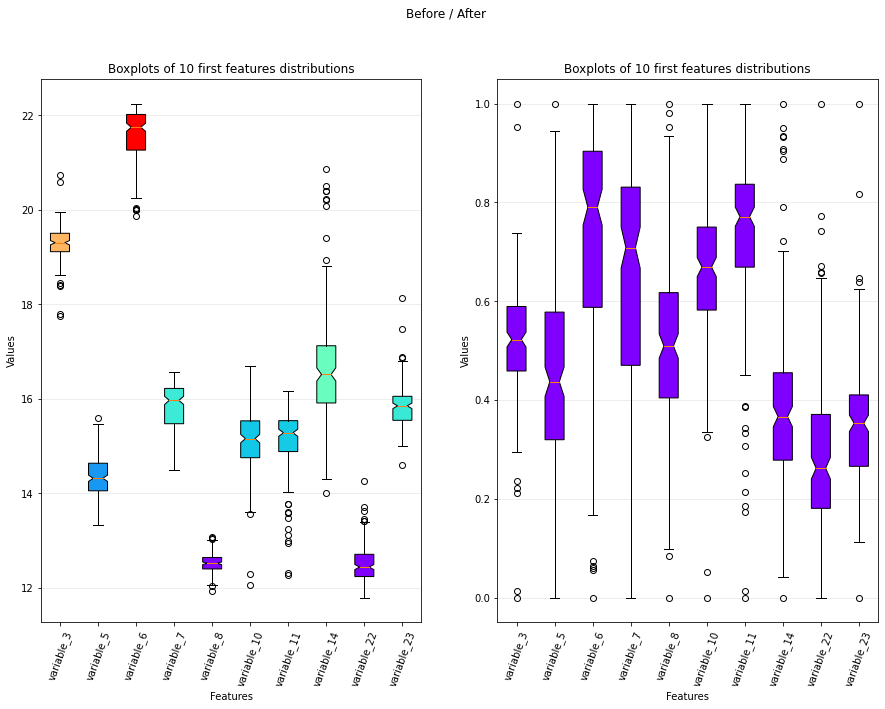

In [55]:
nsf.boxplot_first_distributions_metabolites_before_after(X_KNN, nsf.normPeakTable(X_KNN, 'minmax_scaling', based='metabolite'))

## Maximum absolute scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij}}{x_{j_{max}}}
\end{eqnarray}

In [56]:
nsf.normPeakTable(X_KNN, 'max_abs_scaling', based='metabolites')

,variable_3,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,...,variable_2339,variable_2340,variable_2350,variable_2353,variable_2364,variable_2365,variable_2368,variable_2370,variable_2375,variable_2379
0,0.953356,0.938722,0.997153,0.990556,0.964462,0.933255,0.981826,0.839199,0.896563,0.927091,...,0.885759,0.945375,0.881654,0.974735,0.951800,0.954208,0.993089,0.954818,0.982604,0.988581
1,0.952078,0.974483,0.936289,0.908353,0.957129,0.907188,0.867654,0.860915,0.838980,0.877558,...,0.956908,0.972452,0.915366,0.952416,0.979422,0.953250,0.944343,0.943463,0.944817,0.957962
2,0.922206,0.990730,0.995671,0.990320,0.946771,0.876249,0.946918,0.834587,0.896108,0.879735,...,0.912148,0.931170,0.877893,0.982060,0.950062,0.935538,0.989381,0.941724,0.970716,0.981166
3,0.934787,0.991616,0.996425,0.989906,0.972538,0.954612,0.987162,0.759410,0.860526,0.903127,...,0.931520,0.949315,0.874567,0.980144,0.955705,0.914118,0.994125,0.952044,0.978408,0.983618
4,0.943426,0.931006,0.995565,0.987990,0.941441,0.895495,0.945566,0.796487,0.855996,0.892125,...,0.935673,0.941857,0.843193,0.980332,0.959668,0.939393,0.987766,0.954968,0.974532,0.985638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.948686,0.926665,0.935259,0.906821,0.966999,0.886914,0.880653,0.821250,0.846651,0.848909,...,0.907590,0.865371,0.881404,0.897000,0.947941,0.953250,0.860423,0.958516,0.901514,0.858151
182,0.931173,0.951813,0.947694,0.924558,0.956475,0.867818,0.937423,0.806385,0.872717,0.908823,...,0.948745,0.950903,0.851533,0.892094,0.987566,0.981652,0.847344,0.976461,0.899199,0.868985
183,0.924837,0.916650,0.961031,0.917083,0.955625,0.864632,0.897694,0.782376,0.897651,0.861315,...,0.944120,0.996128,0.870877,0.896241,0.947997,0.951702,0.852667,0.947332,0.901302,0.874266
184,0.910310,0.926198,0.942135,0.894923,0.941312,0.845412,0.851686,0.772508,0.887770,0.883828,...,0.917030,0.886761,0.884653,0.912787,0.903588,0.951274,0.866483,0.957026,0.906819,0.858151


KeyboardInterrupt: 

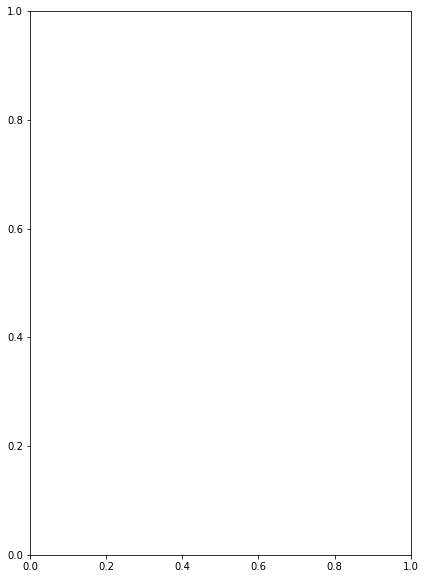

In [57]:
nsf.boxplot_first_distributions_metabolites_before_after(X_KNN, nsf.normPeakTable(X_KNN, 'max_abs_scaling', based='metabolite'))

## Level scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\bar{x}_j}
\end{eqnarray}

In [ ]:
nsf.normPeakTable(X_KNN, 'level_scaling', based='metabolites')

In [ ]:
nsf.boxplot_first_distributions_metabolites_before_after(X_KNN, nsf.normPeakTable(X_KNN, 'level_scaling', based='metabolite'))

## Robust scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - Q_2(x_j)}{Q_3(x_j) - Q_1(x_j)}
\end{eqnarray}

_Use <code>RobustScaler()</code> function from <code>scikitlearn</code> package_

In [ ]:
nsf.normPeakTable(X_KNN, 'robust_scaling', based='metabolites')

In [ ]:
nsf.boxplot_first_distributions_metabolites_before_after(X_KNN, nsf.normPeakTable(X_KNN, 'robust_scaling', based='metabolite'))

## Autoscaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j}
\end{eqnarray}

_Use <code>StandardScaler()</code> function from <code>scikitlearn</code> package_

In [ ]:
nsf.normPeakTable(X_KNN, 'autoscaling', based='metabolites')

In [ ]:
nsf.boxplot_first_distributions_metabolites_before_after(X_KNN, nsf.normPeakTable(X_KNN, 'autoscaling', based='metabolite'))

## Pareto scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{\sqrt{s_j}}
\end{eqnarray}

In [ ]:
normPeakTable(X_KNN, 'pareto_scaling', based='metabolites')

In [ ]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'pareto_scaling', based='metabolite'))

## Vast scaling

\begin{eqnarray}
    \tilde{x}_{ij} = \frac{x_{ij} - \bar{x}_j}{s_j} \cdot \frac{\bar{x}_j}{s_j}
\end{eqnarray}

In [ ]:
normPeakTable(X_KNN, 'vast_scaling', based='metabolites')

In [ ]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'vast_scaling', based='metabolite'))

# Sample-based Normalisation Methods

At this point, we want to normalise our peak table based on sample values

*Reminder : peak table of dimension $(n,p)$, rows = samples with iterator $i$, columns = features (metabolites) with iterator $j$*

Inspired by [this course](https://www.uab.edu/proteomics/metabolomics/workshop/2014/statistical%20analysis.pdf) and [this paper (NOREVA)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5570188/), here are all the Metabolite-based Normalization Methods available in this notebook :

<table>
  <tr>
    <th>Method</th>
    <th>Formula</th>
  </tr>
  <tr>
    <td>Mean normalisation</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = x_{ij} - \bar{x}_i
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>Median normalisation</td>
    <td>
        \begin{eqnarray}
            \tilde{x}_{ij} = x_{ij} - Q_2(x_i)
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>L1 normalisation</td>
    <td>
        \begin{eqnarray}
             \sum_{i=1}^p x_{ni} = 1
        \end{eqnarray}
    </td>
  </tr>
  <tr>
    <td>L2 normalisation</td>
    <td>
        \begin{eqnarray}
            \sqrt{\sum_{i=1}^p x_{ni} ^2} = 1
        \end{eqnarray}
    </td>
  </tr>
</table>

## Mean normalisation

\begin{eqnarray}
    \tilde{x}_{ij} = x_{ij} - \bar{x}_i
\end{eqnarray}

In [ ]:
normPeakTable(X_KNN, 'mean_normalisation', based='samples')

In [ ]:
normPeakTable(X_KNN, 'mean_normalisation', based='samples').mean(axis=1).round()

In [ ]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'mean_normalisation', based='samples'))

## Median normalisation

\begin{eqnarray}
    \tilde{x}_{ij} = x_{ij} - Q_2(x_i)
\end{eqnarray}

In [ ]:
nsf.normPeakTable(X_KNN, 'median_normalisation', based='samples')

In [ ]:
nsf.normPeakTable(X_KNN, 'median_normalisation', based='samples').median(axis=1)

In [ ]:
row_medians = np.median(X_KNN, axis=1)
row_medians = np.array(row_medians).reshape((row_medians.shape[0], 1))
print('Median :\n', (X_KNN - row_medians).median(axis=1), '\n')
print('Mean :\n', (X_KNN - row_medians).mean(axis=1), '\n')

In [ ]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'median_normalisation', based='samples'))

## L1 normalisation

After this normalisation, for each sample n, index of metabolites = $\{1,p\}$, the transformed peak table verify :

\begin{eqnarray}
     \sum_{i=1}^p x_{ni} = 1
\end{eqnarray}

In [ ]:
normPeakTable(X_KNN, 'l1_normalisation', based='samples')

In [ ]:
normPeakTable(X_KNN, 'l1_normalisation', based='samples').sum(axis=1)

In [ ]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'l1_normalisation', based='samples'))

## L2 normalisation

After this normalisation, for each sample n, index of metabolites = $\{1,p\}$, the transformed peak table verify :

\begin{eqnarray}
    \sqrt{\sum_{i=1}^p x_{ni} ^2} = 1
\end{eqnarray}

In [ ]:
normPeakTable(X_KNN, 'l2_normalisation', based='samples')

In [ ]:
np.sqrt((normPeakTable(X_KNN, 'l2_normalisation', based='samples') * normPeakTable(X_KNN, 'l2_normalisation', based='samples')).sum(axis=1))

In [ ]:
boxplot_first_distributions_metabolites_before_after(X_KNN, normPeakTable(X_KNN, 'l2_normalisation', based='samples'))

### EXERCISE : comment the different treatements

#### Based on your criteria, which method(s) should be used on these data ?

#### What are the common transformation/scaling/normalisation methods used in metabolomics (on LC-MS data in particular) ? Does it correspond to the "best" method(s) you found here ?

Depanding on the methods use to analyse our data different normalisation methods could be needed


https://www.scirp.org/pdf/ABB_2018081015055107.pdf

### libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import seaborn as sns
import math
import numpy as np
import os
import sys

In [2]:
sys.path.append('/'.join(os.getcwd().split('/')[:-1]) + '/bin/')
import normalisation_scaling_functions as nsf

### Import data

In [3]:
path_X_imputed = '/'.join(os.getcwd().split('/')[:-1]) + '/data/peakTable/imputed_peak_tables/'
X_imp = pd.read_csv(path_X_imputed+"X_KNN_samples.csv", sep=',', decimal='.', na_values='NA')

### Export folder

In [4]:
path_X_scaling = '/'.join(os.getcwd().split('/')[:-1]) + '/data/peakTable/scaled_peak_tables/'

### Methods used

In [5]:
methods=["l1_normalisation",
         "l2_normalisation",
         "median_normalisation",
         "vast_scaling",
         "pareto_scaling",
         "autoscaling",
         "robust_scaling",
         "level_scaling",
         "max_abs_scaling",
         "minmax_scaling",
         "range_scaling",
         "cbrt",
         "sqrt",
         "log10",
         "log2",
         "loge"]

imputation_methods=["X_mean",
                    "X_median",
                    "X_const_1",
                    "X_python_MICE_ExtraTreesRegressor",
                    "X_min_f",
                    "subset_multival_MICE_KNeighborsRegressor",
                    "X_KNN_features",
                    "X_python_MICE_KNeighborsRegressor",
                    "subset_multival_MICE_BayesianRidge",
                    "subset_multival_MICE_ExtraTreesRegressor",
                    "X_python_MICE_DecisionTreeRegressor",
                    "X_most",
                    "X_python_MICE_BayesianRidge",
                    "X_KNN_samples",
                    "X_half_min_f",
                    "subset_multival_MICE_DecisionTreeRegressor",
                    "X_const_0"]

### Transform plot and save all methods

begin l1_normalisation-----------------------------------------------------------


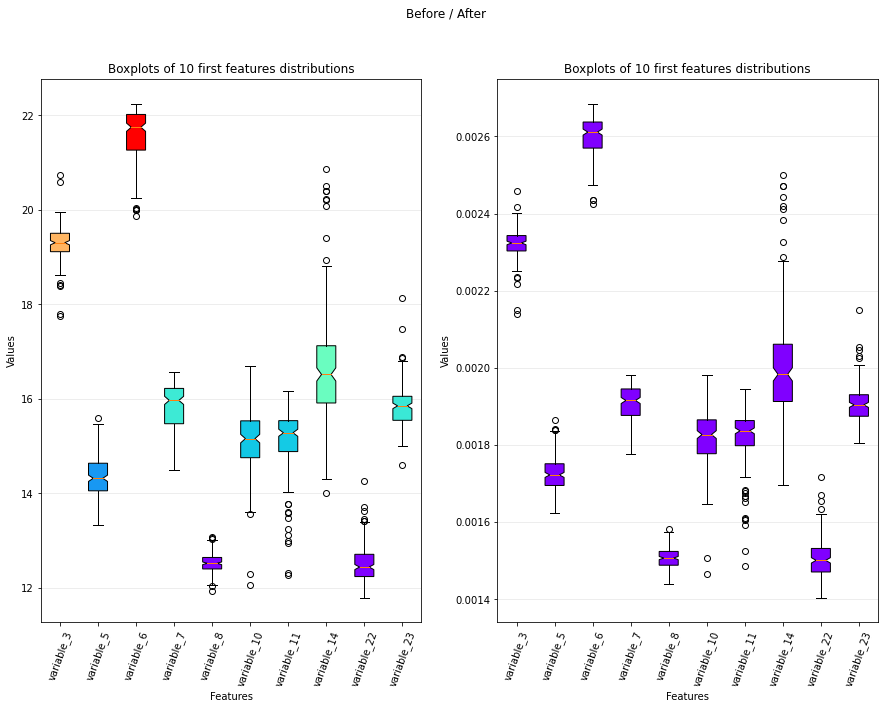

end l1_normalisation--------------------------------------------------------------
begin l2_normalisation-----------------------------------------------------------


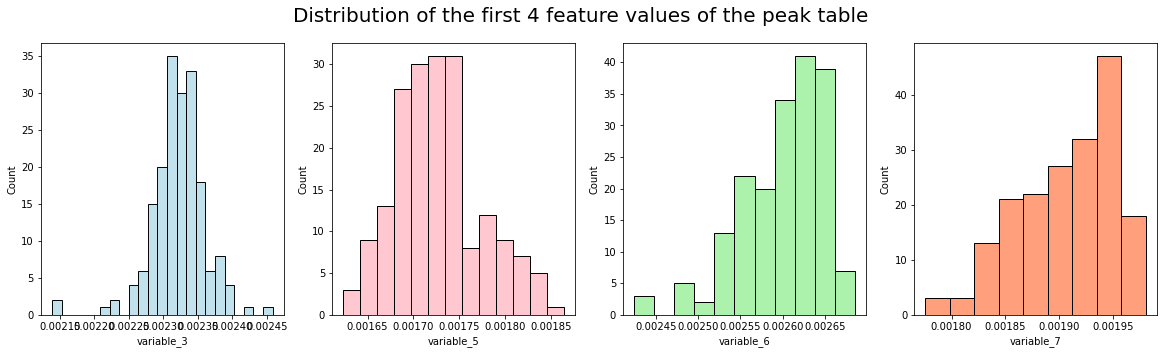

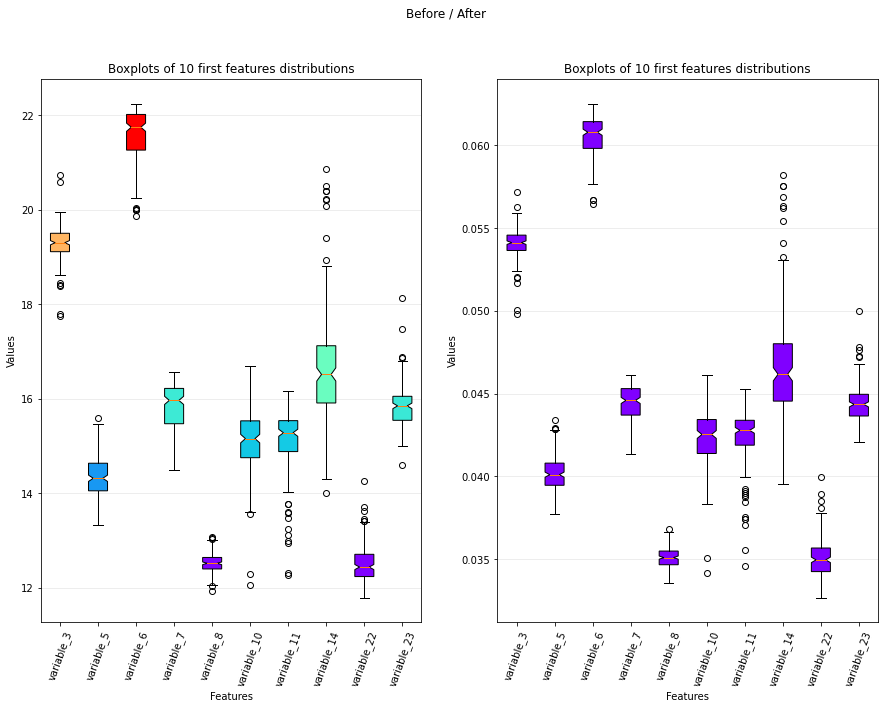

end l2_normalisation--------------------------------------------------------------
begin median_normalisation-----------------------------------------------------------


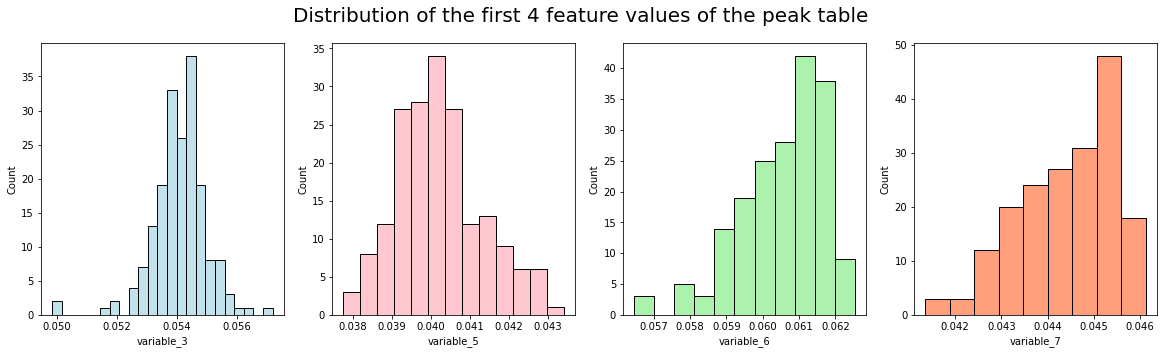

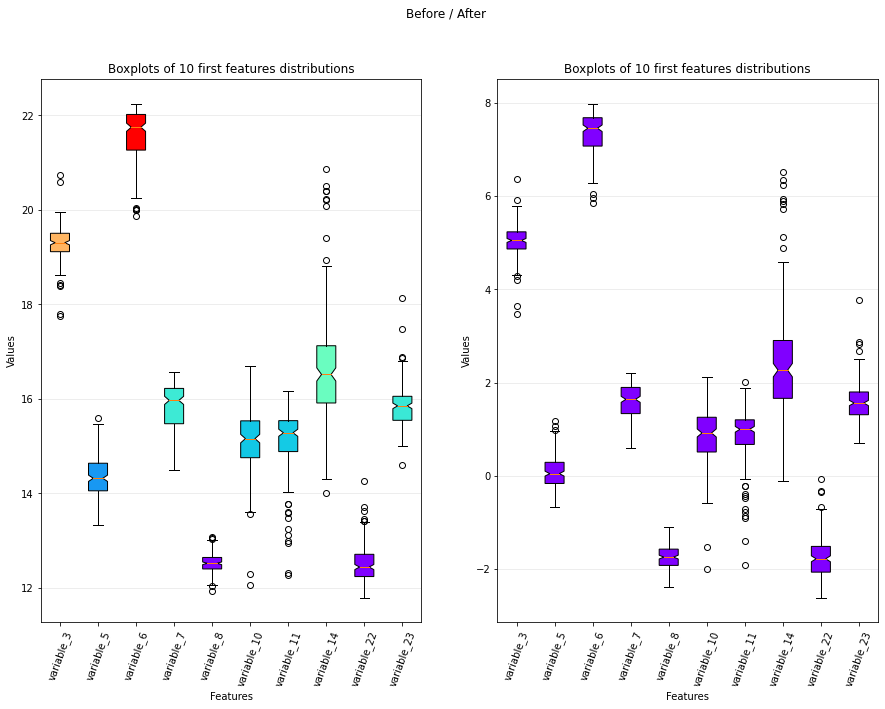

end median_normalisation--------------------------------------------------------------
begin vast_scaling-----------------------------------------------------------


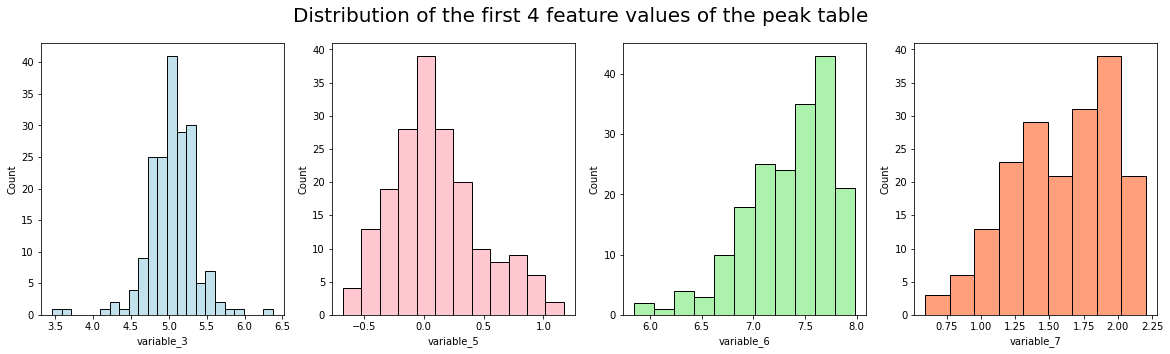

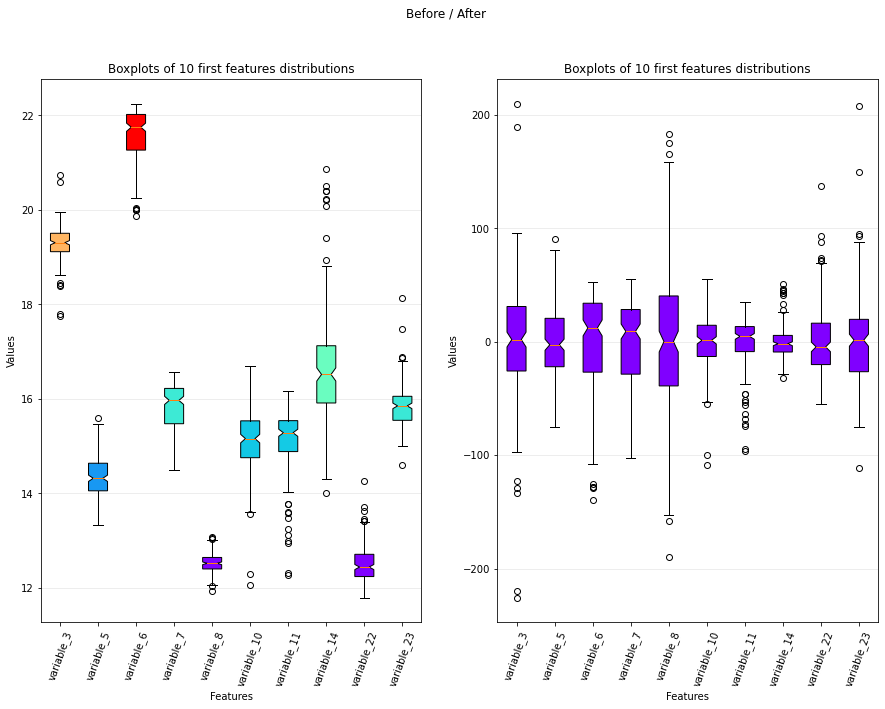

end vast_scaling--------------------------------------------------------------
begin pareto_scaling-----------------------------------------------------------


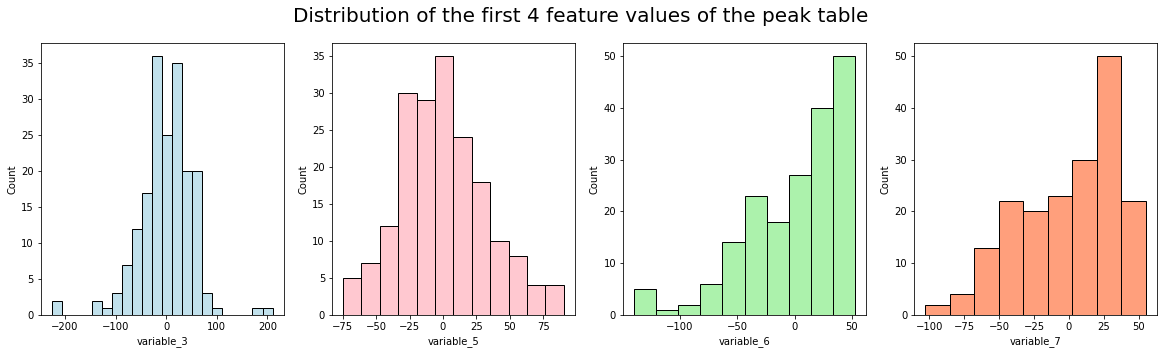

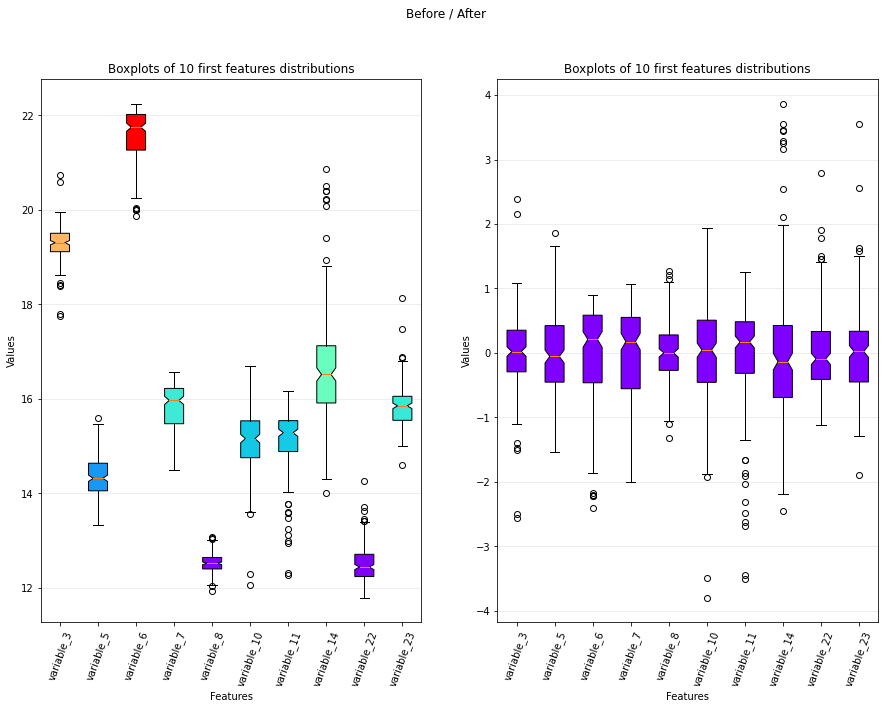

end pareto_scaling--------------------------------------------------------------
begin autoscaling-----------------------------------------------------------


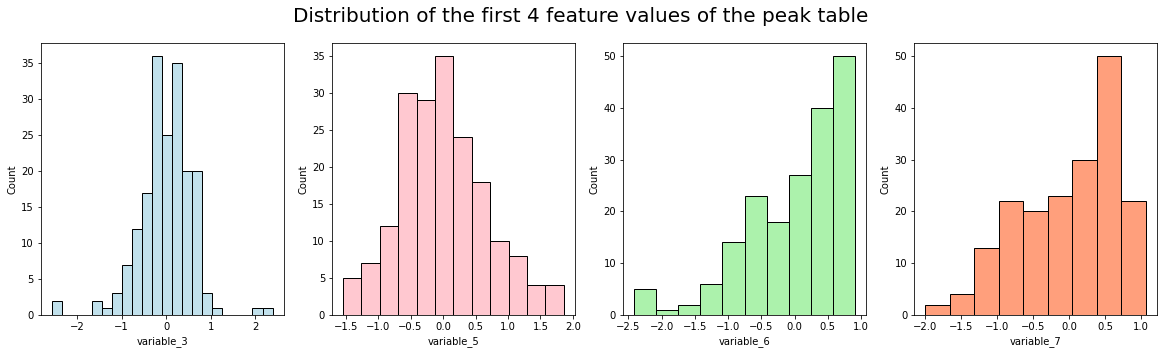

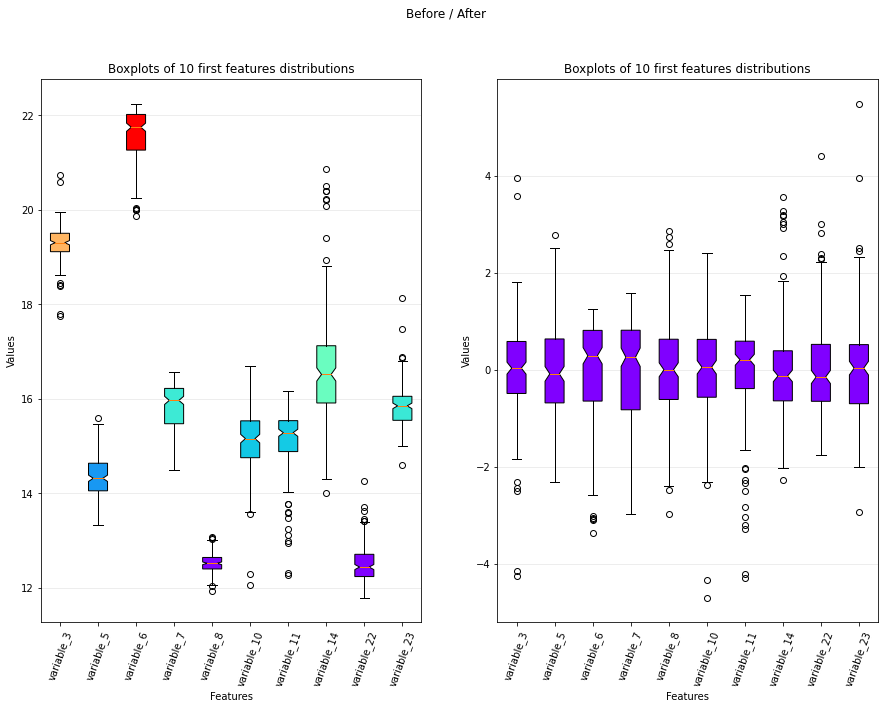

end autoscaling--------------------------------------------------------------
begin robust_scaling-----------------------------------------------------------


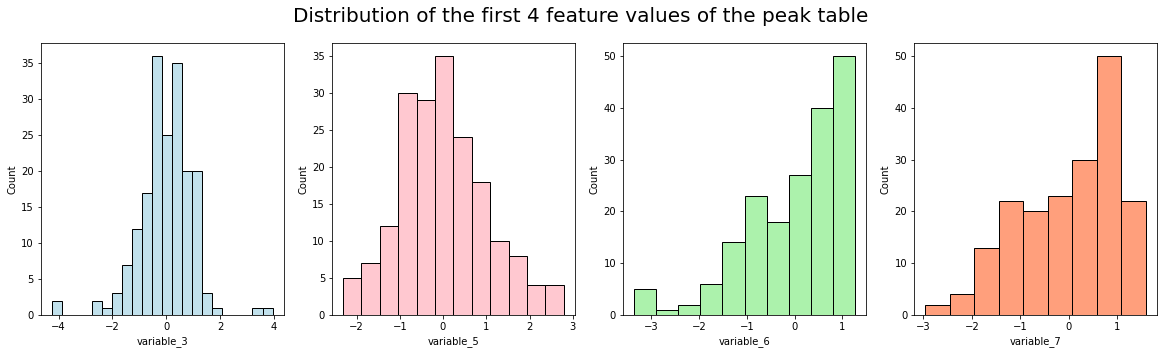

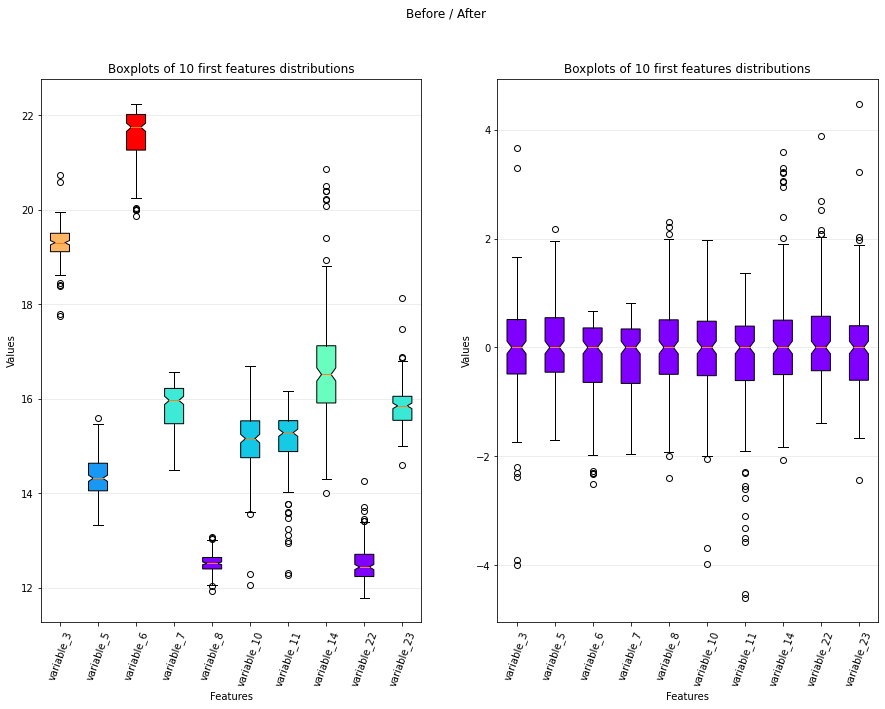

end robust_scaling--------------------------------------------------------------
begin level_scaling-----------------------------------------------------------


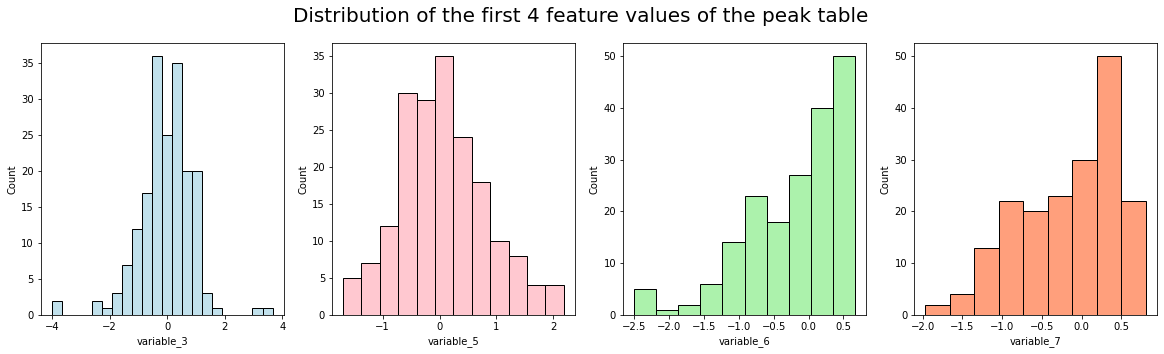

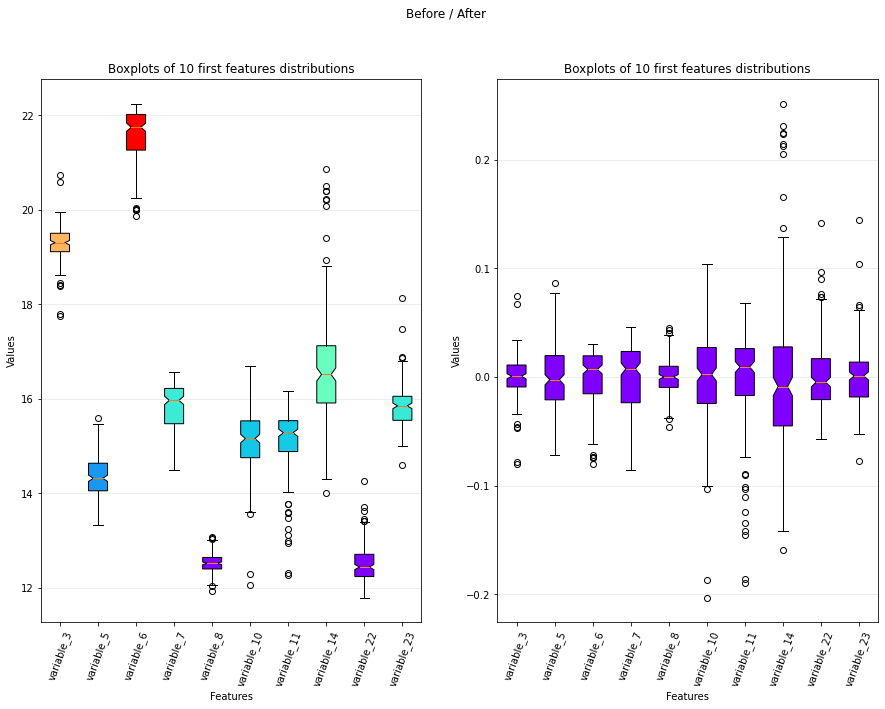

end level_scaling--------------------------------------------------------------
begin max_abs_scaling-----------------------------------------------------------


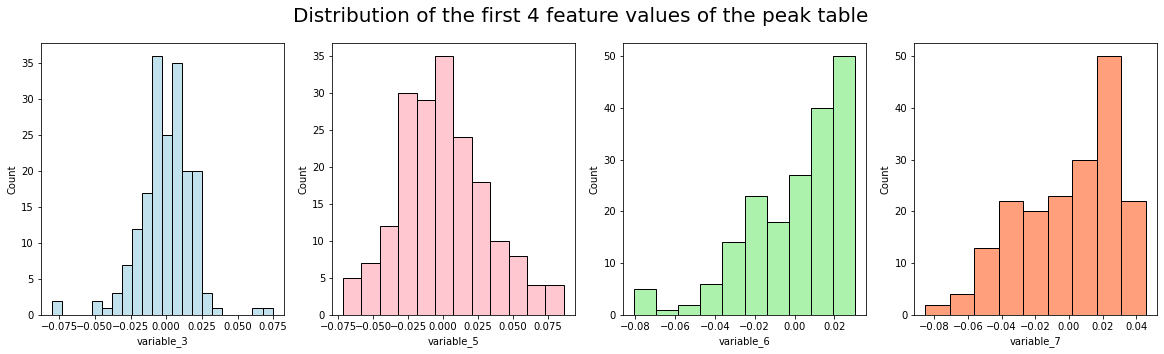

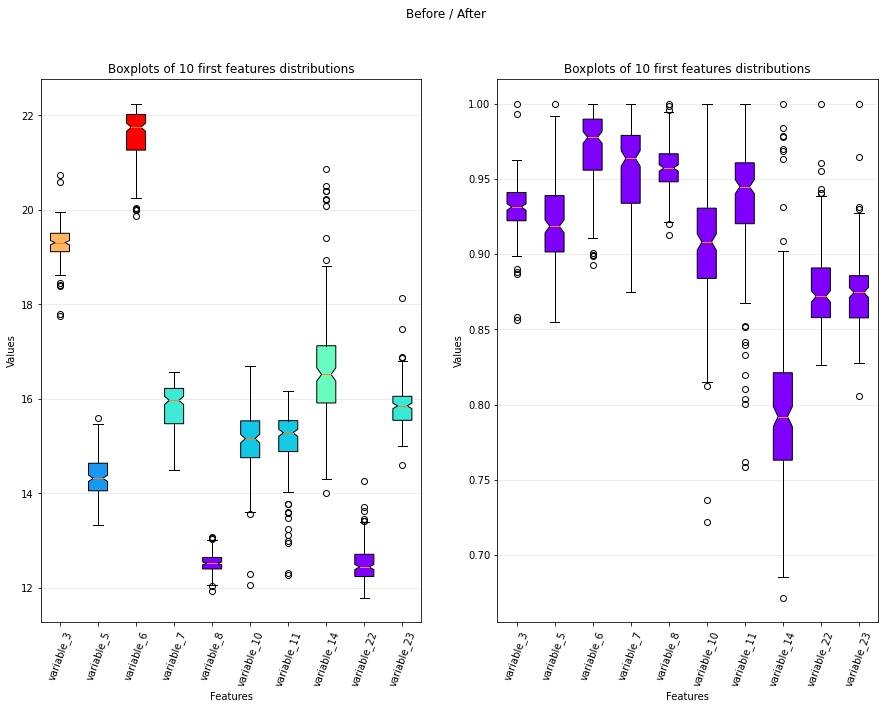

end max_abs_scaling--------------------------------------------------------------
begin minmax_scaling-----------------------------------------------------------


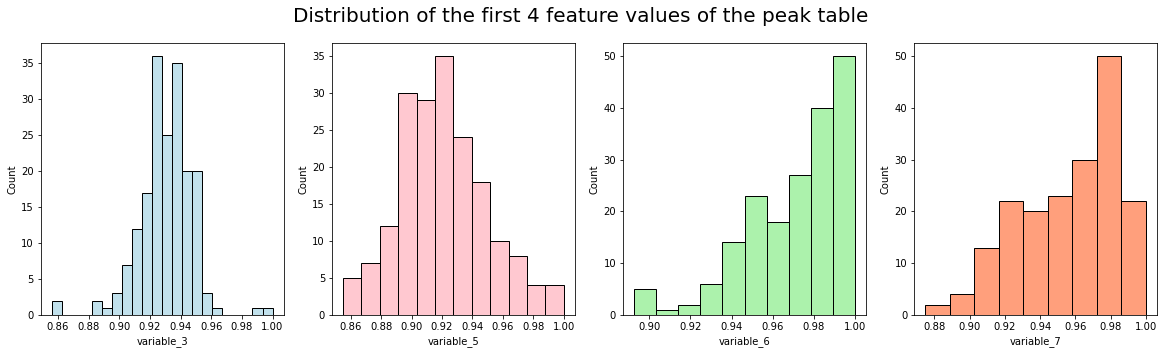

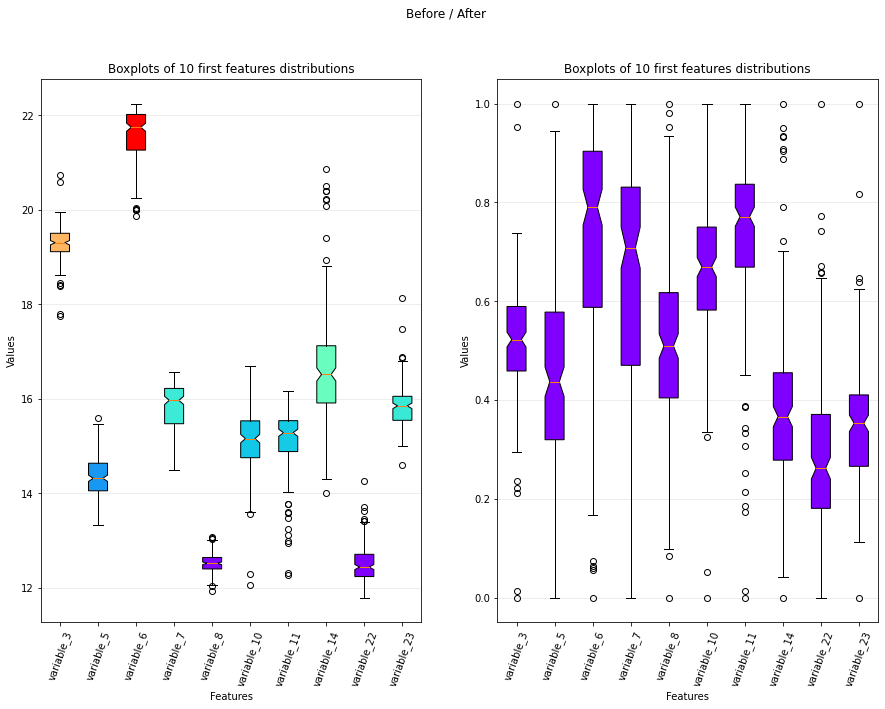

end minmax_scaling--------------------------------------------------------------
begin range_scaling-----------------------------------------------------------


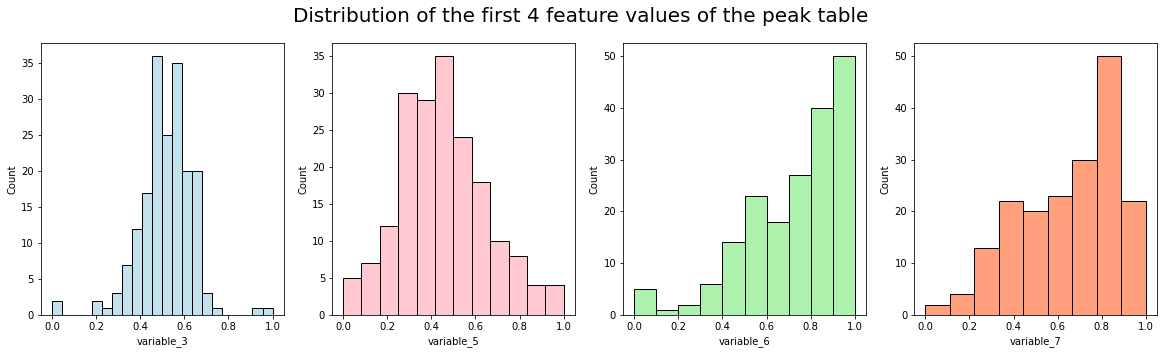

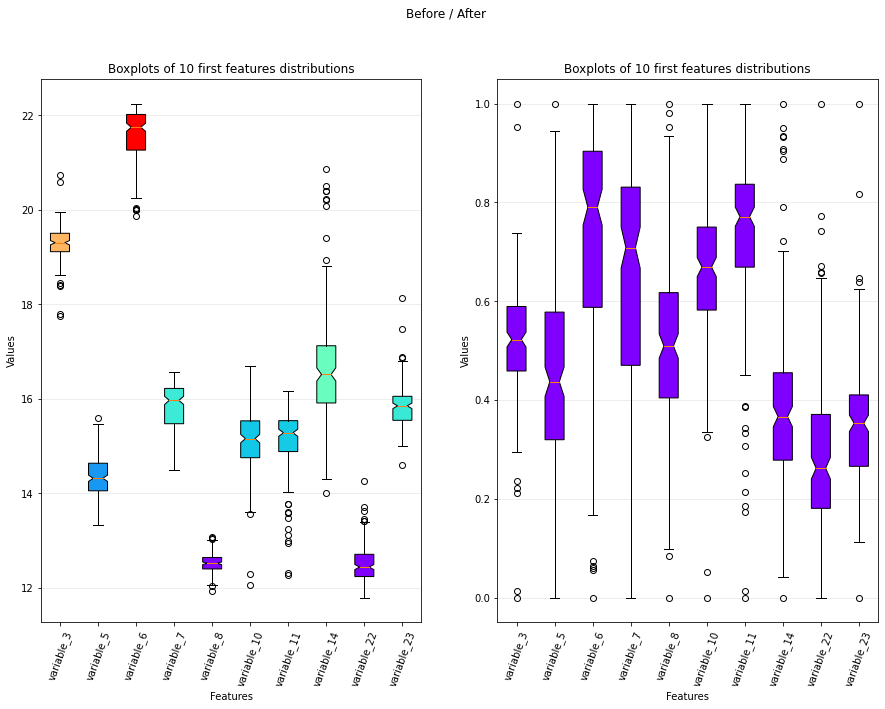

end range_scaling--------------------------------------------------------------
begin cbrt-----------------------------------------------------------


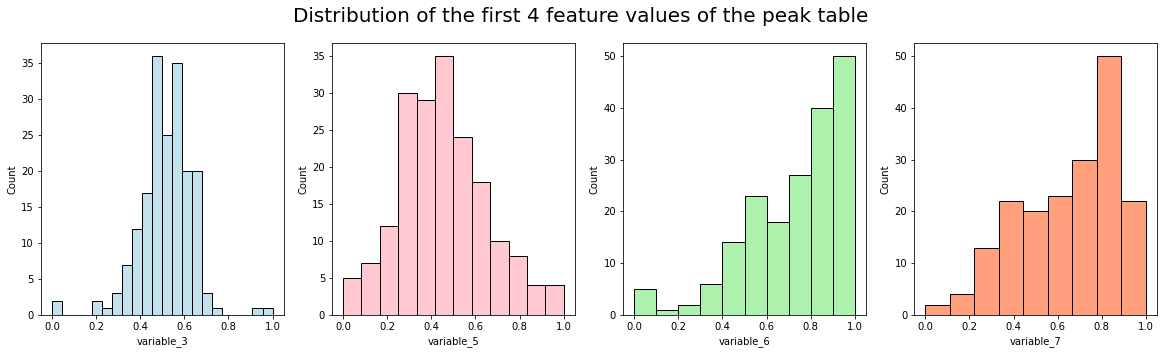

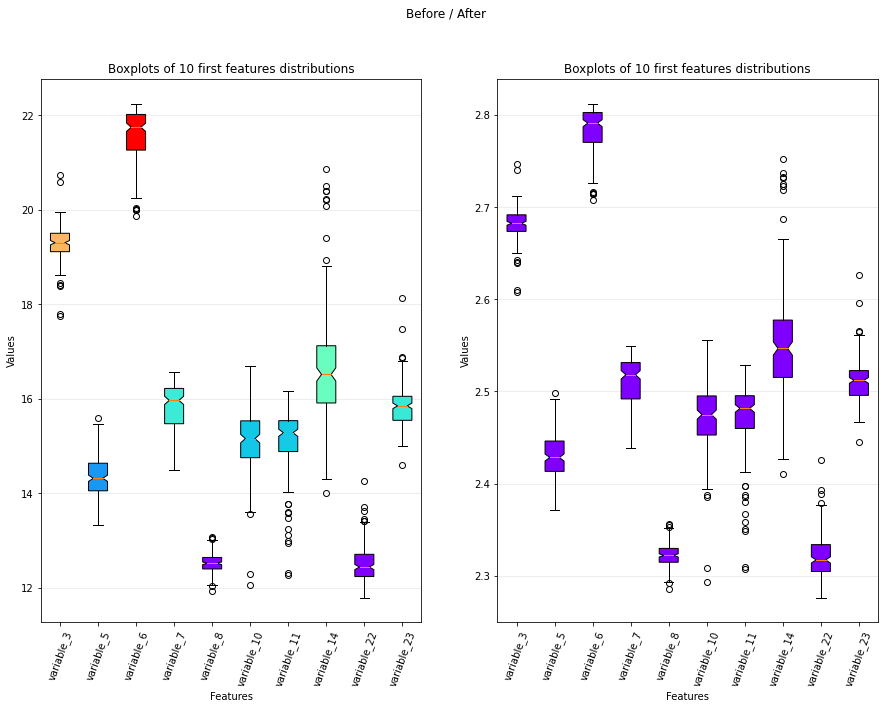

end cbrt--------------------------------------------------------------
begin sqrt-----------------------------------------------------------


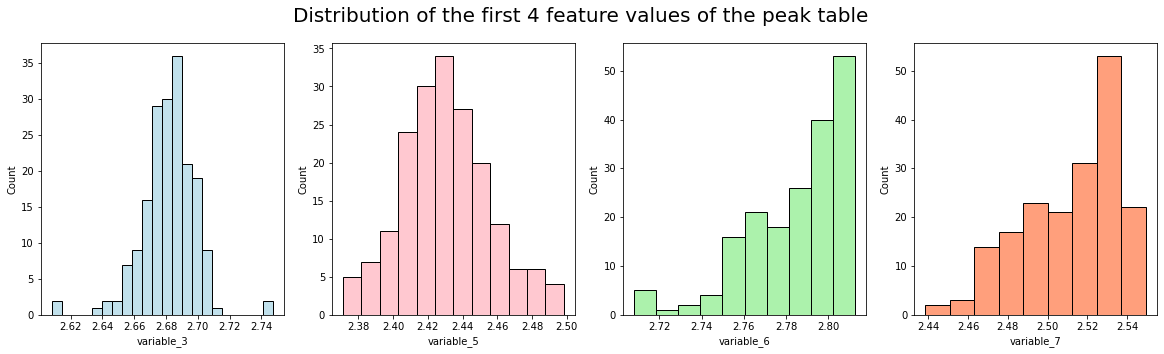

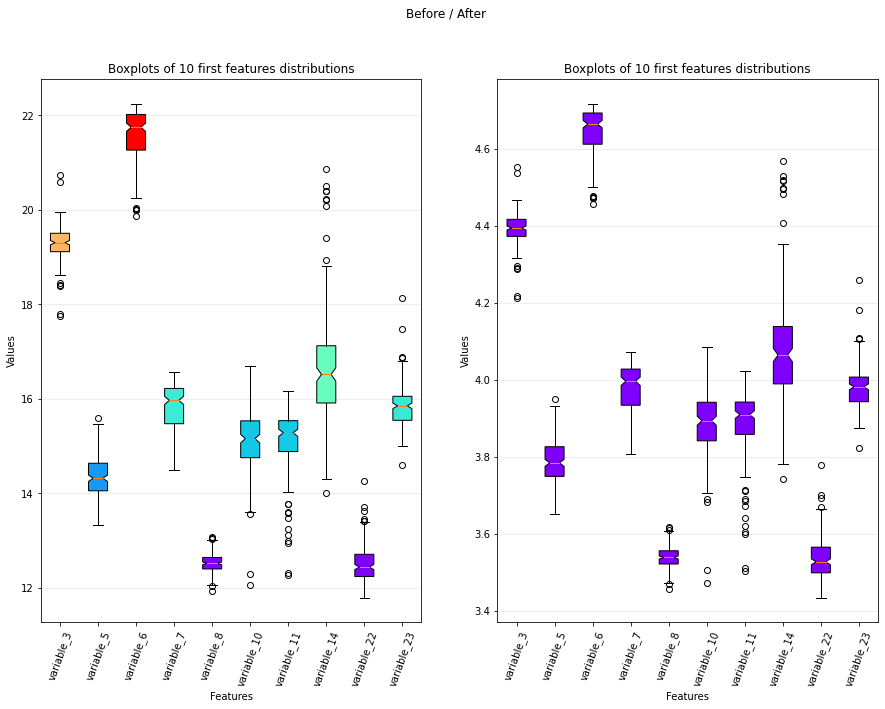

end sqrt--------------------------------------------------------------
begin log10-----------------------------------------------------------


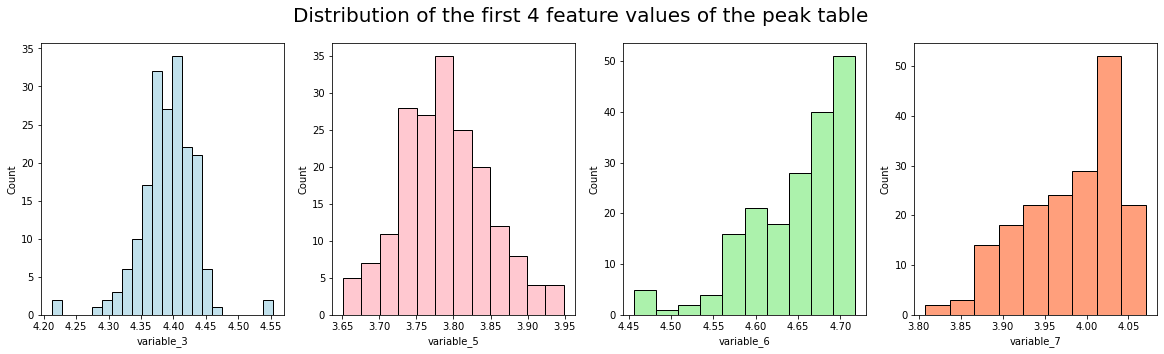

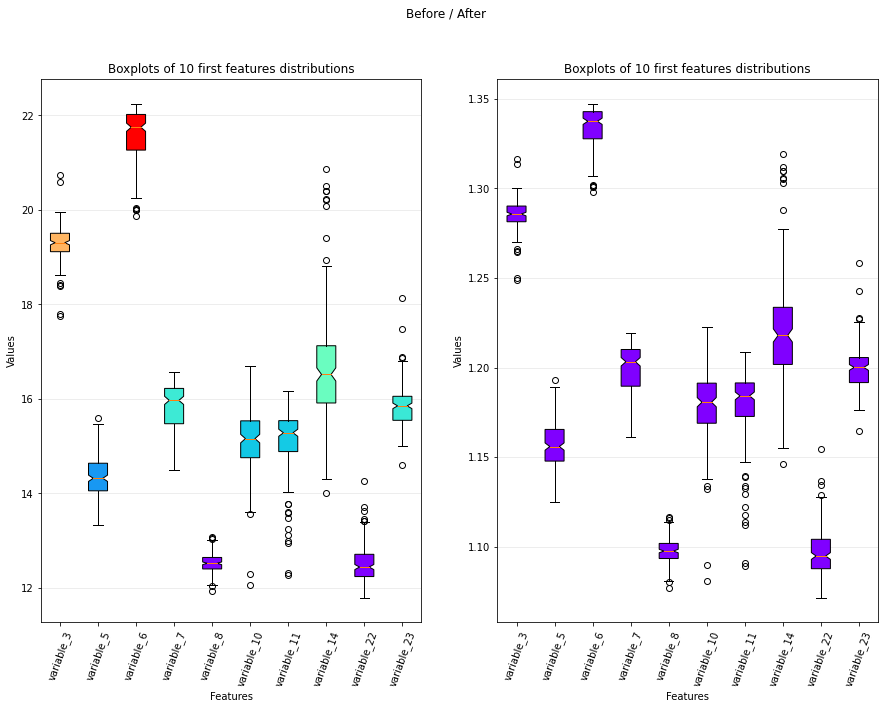

end log10--------------------------------------------------------------
begin log2-----------------------------------------------------------


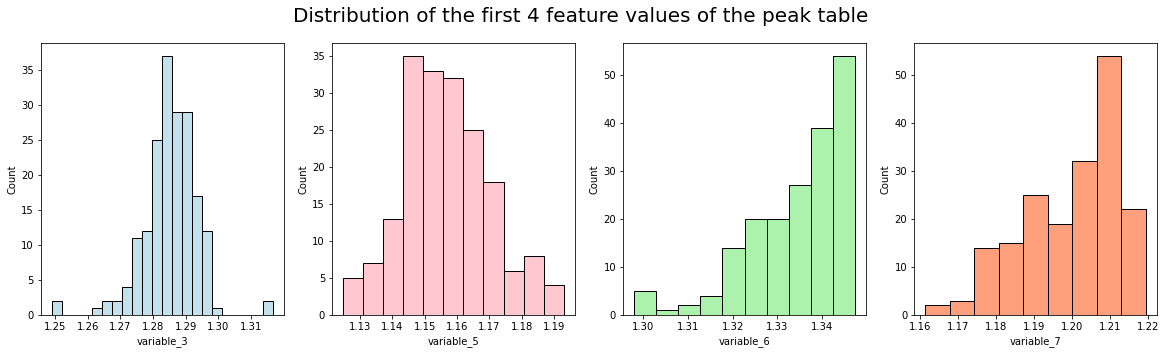

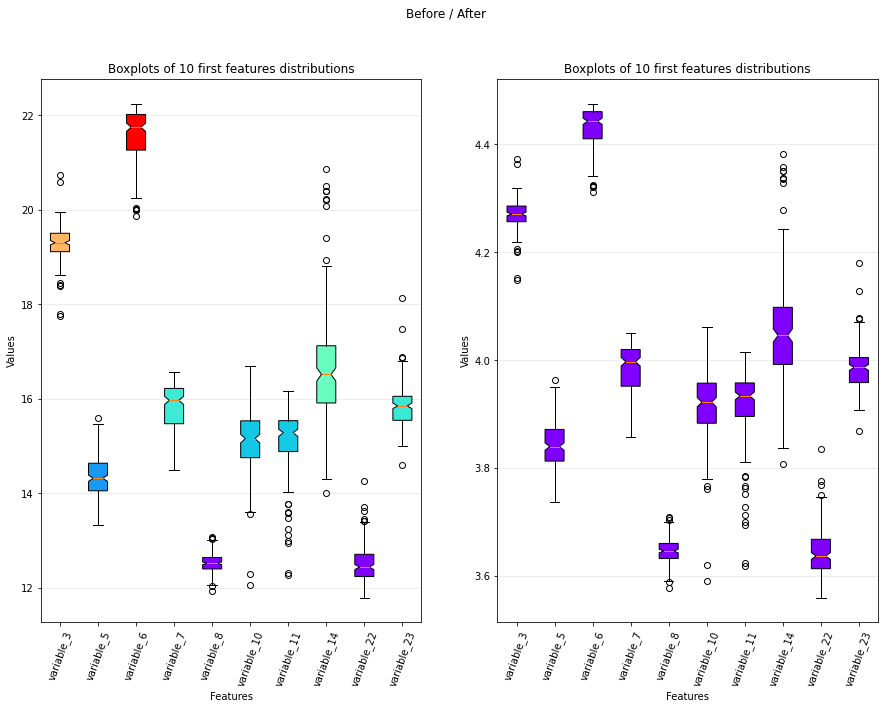

end log2--------------------------------------------------------------
begin loge-----------------------------------------------------------


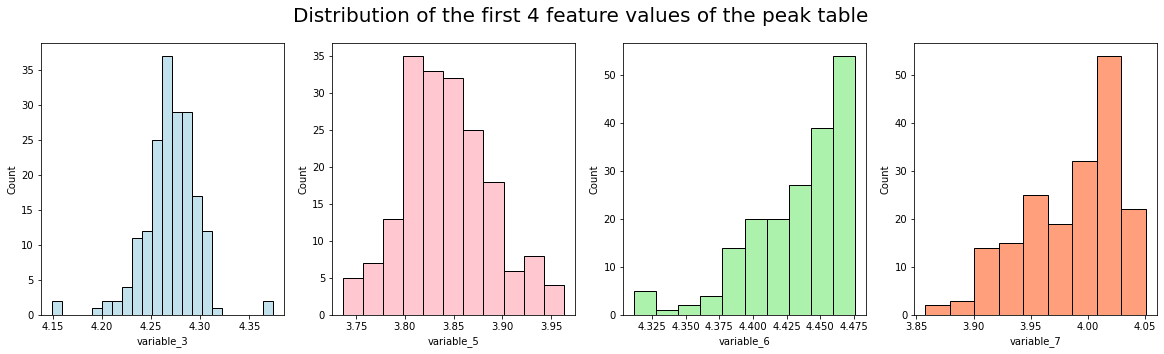

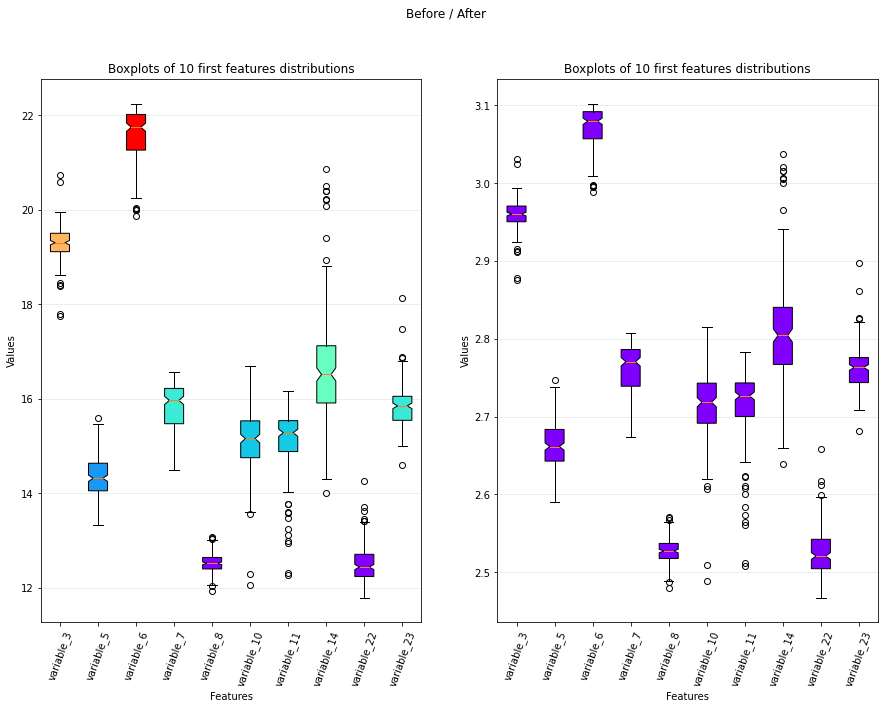

end loge--------------------------------------------------------------


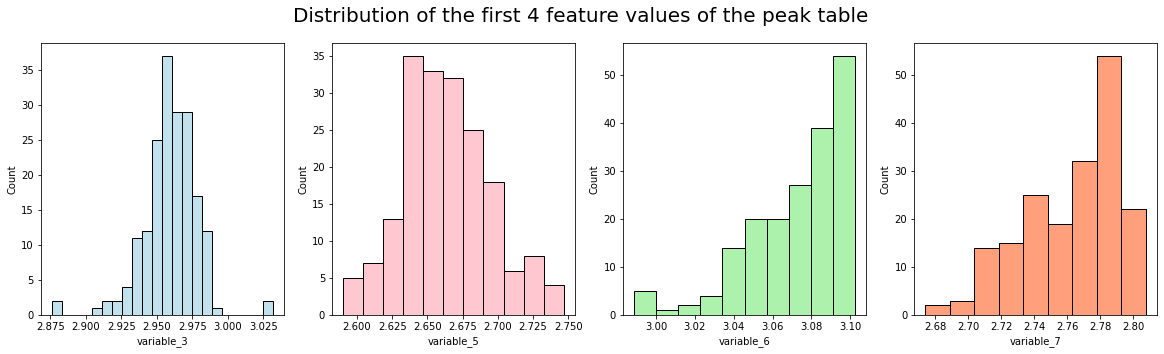

In [6]:
for method in methods:
    print("begin "+method+"-----------------------------------------------------------")
    data_to_save=nsf.normPeakTable(X_imp, method, based='samples')
    data_to_save.to_csv(path_X_scaling+method+".csv")
    nsf.boxplot_first_distributions_metabolites_before_after(X_imp, data_to_save)
    nsf.plot_first_distributions_metabolites(data_to_save)
    #nsf.plot_first_distributions_samples(data_to_save)
    print("end "+method+"--------------------------------------------------------------")

    #np.sqrt((normPeakTable(X_KNN, 'l2_normalisation', based='samples') * normPeakTable(X_KNN, 'l2_normalisation', based='samples')).sum(axis=1))
#normPeakTable(X_KNN, 'l2_normalisation', based='samples')

In [64]:
method="l1_normalisation"
imputation="X_KNN_samples"
print(method)
X_imp = pd.read_csv(path_X_imputed+imputation+".csv", sep=',', decimal='.', na_values='NA')
data_to_save=nsf.normPeakTable(X_imp, method, based='samples')
data_to_save.to_csv(path_X_scaling+method+"_"+imputation+"_test.csv")

l1_normalisation


### Save all combination

In [66]:
for imputation in imputation_methods :
    X_imp = pd.read_csv(path_X_imputed+imputation+".csv", sep=',', decimal='.', na_values='NA')
    for method in methods:
        print(method)
        data_to_save=nsf.normPeakTable(X_imp, method, based='samples')
        data_to_save.to_csv(path_X_scaling+method+"-"+imputation+".csv")
        print("saved : " +method+"-"+imputation+".csv")


l1_normalisation
saved : l1_normalisation_X_mean.csv
l2_normalisation
saved : l2_normalisation_X_mean.csv
median_normalisation
saved : median_normalisation_X_mean.csv
vast_scaling
saved : vast_scaling_X_mean.csv
pareto_scaling
saved : pareto_scaling_X_mean.csv
autoscaling
saved : autoscaling_X_mean.csv
robust_scaling
saved : robust_scaling_X_mean.csv
level_scaling
saved : level_scaling_X_mean.csv
max_abs_scaling
saved : max_abs_scaling_X_mean.csv
minmax_scaling
saved : minmax_scaling_X_mean.csv
range_scaling
saved : range_scaling_X_mean.csv
cbrt
saved : cbrt_X_mean.csv
sqrt
saved : sqrt_X_mean.csv
log10
saved : log10_X_mean.csv
log2
saved : log2_X_mean.csv
loge
saved : loge_X_mean.csv
l1_normalisation
saved : l1_normalisation_X_median.csv
l2_normalisation
saved : l2_normalisation_X_median.csv
median_normalisation
saved : median_normalisation_X_median.csv
vast_scaling
saved : vast_scaling_X_median.csv
pareto_scaling
saved : pareto_scaling_X_median.csv
autoscaling
saved : autoscaling_X_m

saved : loge_subset_multival_MICE_BayesianRidge.csv
l1_normalisation
saved : l1_normalisation_subset_multival_MICE_ExtraTreesRegressor.csv
l2_normalisation
saved : l2_normalisation_subset_multival_MICE_ExtraTreesRegressor.csv
median_normalisation
saved : median_normalisation_subset_multival_MICE_ExtraTreesRegressor.csv
vast_scaling
saved : vast_scaling_subset_multival_MICE_ExtraTreesRegressor.csv
pareto_scaling
saved : pareto_scaling_subset_multival_MICE_ExtraTreesRegressor.csv
autoscaling
saved : autoscaling_subset_multival_MICE_ExtraTreesRegressor.csv
robust_scaling
saved : robust_scaling_subset_multival_MICE_ExtraTreesRegressor.csv
level_scaling
saved : level_scaling_subset_multival_MICE_ExtraTreesRegressor.csv
max_abs_scaling
saved : max_abs_scaling_subset_multival_MICE_ExtraTreesRegressor.csv
minmax_scaling
saved : minmax_scaling_subset_multival_MICE_ExtraTreesRegressor.csv
range_scaling
saved : range_scaling_subset_multival_MICE_ExtraTreesRegressor.csv
cbrt
saved : cbrt_subset_mu